## Midterm Project

CS 181/DA 210, Spring 2022 <br>
Dr. Kell

You may choose to work this project individually or with a partner. If you work with a partner, you will submit a single file between the two of you. Please specifiy your partner in the cell below. 

Before you turn in your submission, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All). Make sure you fill in any place that says ADD PART X CELL(S) HERE.

In [240]:
# Specify groups members below
NAME1 = "DAGMAWI ZERIHUN"
NAME2 = "ZUYOU WANG"

## Project Overview

In this project, you'll process and analyze three Json files containing data on tweets related to Covid-19 during the days leading up to the initial campus shutdowns before spring break of 2020. 

The files you will process are called <code>covid19_tweets_2020_03_10.json</code>, <code>covid19_tweets_2020_03_11.json</code>, and <code>covid19_tweets_2020_03_12.json</code>, which contain metadata on tweets that were tagged as being related to either "Covid19" or "Coronavirus" on 3/10/2020, 3/11/2020, and 3/12/2020, respectively. (The last file also contains some tweets from early morning on 3/13/2020). You should look over all three files and familiarize yourself with their contents. Each can be found in the "Midterm Project" folder on Notebowl.

The first part of the project will be "guided", where your goal will be to read-in and process the Json data to produce tweet frequency plots in the three major cities in Ohio: Columbus, Cincinnati, and Cleveland. At the end of the project, you will have the chance to do some brief data exploration of your choosing. 

Throughout the project, <i>you will also be asked to briefly explain how your code works in Markdown cells</i>. Thus, your submission will be <b>graded based on both correctness and the quality of your exposition</b>. You will also be graded based on <b>good coding practices and style</b> (e.g., all functions should include docstrings). 
 
Finally. note that the data was obtained (and slightly modified) from the following website: https://data.gesis.org/tweetscov19/ (which was originally scrapped using the Twitter Developer API). 

## Part 1 [15 points]: Convert Hierarchical Json Data to Tabular Representations

In this first part, you will read-in all three Json files and convert/combine them into DoL tabular representations, creating three tables (one table for each city Columbus, Cincinnati, and Cleveland). The rows of each table will correspond to individual tweets, where the columns correspond to the fields: <code>tweet_id</code>, <code>user_id</code>, and <code>date</code>. The contents of each table should span the data from all three days given over the three different files. 

In particular, you should use the following approach:

* First, write a function called <code>makeCityDol(jsonFileNameList, city)</code> that takes in a parameter <code>jsonFileNameList</code> containing a list of file names (each ecified  as a string) and a string parameter <code>city</code> that specifies which city the table will correspond to (e.g, you will pass <code>"Columbus"</code> for <code>city</code> to create the Columbus table). Your function should then read-in the Json files specified in <code>jsonFileNameList</code> and construct/return a DoL representation that contains all tweets that were located in <code>city</code>. 


* Note it's fine to write additional functions to help with the processing/filtering in <code>makeCityDol(jsonFileNameList, city)</code>.


* Next, call your <code>makeCityDol(jsonFileNameList, city)</code> function three times to obtain tweet tables for Columbus, Cincinnati, and Cleveland. <br>


* Finally, convert each table to a pandas data frame to verify that the data has been correctly processed. 

In [241]:
from collections import defaultdict
import json
jsonFile = open("covid19_tweets_2020_03_10.json", "r")
a = json.load(jsonFile)
jsonFile.close()
b = []
def filterList(a):
    len_data = len(a)
    for i in range(len_data):
        if a[i]["location"] is not None :
            if a[i]["location"]["city"] is not None:
                b.append(a[i])
filterList(a)    

In [242]:
import pandas as pd
import json 
JsonFileNameList = ["covid19_tweets_2020_03_10.json","covid19_tweets_2020_03_11.json","covid19_tweets_2020_03_12.json"]
newDict = {}

def makeCityJsonFile(JsonFileNameList,city):
    for file in JsonFileNameList:
        jsonFile = open(file, "r")
        a = json.load(jsonFile)
        jsonFile.close()
    filterList(a)
    tweet_id=[]
    user_id=[]
    date=[]
    
    for i in range(len(b)):
        if b[i]["location"]["city"] == city:
            tweet_id.append(b[i]["tweet_id"])
            user_id.append(b[i]["user_id"])
            date.append(b[i]["date"])
    newDict ["Tweet_ID"] = tweet_id
    newDict ["USER_ID"] = tweet_id
    newDict ["Date"] = date
    

In [243]:
makeCityJsonFile(JsonFileNameList,"Columbus")
df = pd.DataFrame(newDict)
df

,Tweet_ID,USER_ID,Date
0,1237226675810840576,1237226675810840576,Tue Mar 10 04:00:00 +0000 2020
1,1237227045941321729,1237227045941321729,Tue Mar 10 04:01:28 +0000 2020
2,1237227548490285057,1237227548490285057,Tue Mar 10 04:03:28 +0000 2020
3,1237227650873204736,1237227650873204736,Tue Mar 10 04:03:53 +0000 2020
4,1237227763322544134,1237227763322544134,Tue Mar 10 04:04:20 +0000 2020
...,...,...,...
3715,1238312686145933314,1238312686145933314,Fri Mar 13 03:55:25 +0000 2020
3716,1238313134470946816,1238313134470946816,Fri Mar 13 03:57:12 +0000 2020
3717,1238313172165148672,1238313172165148672,Fri Mar 13 03:57:21 +0000 2020
3718,1238313294265491456,1238313294265491456,Fri Mar 13 03:57:50 +0000 2020


In [244]:
makeCityJsonFile(JsonFileNameList,"Cincinnati")
df = pd.DataFrame(newDict)
df

,Tweet_ID,USER_ID,Date
0,1237226719041458176,1237226719041458176,Tue Mar 10 04:00:11 +0000 2020
1,1237226956845965313,1237226956845965313,Tue Mar 10 04:01:07 +0000 2020
2,1237226961342205952,1237226961342205952,Tue Mar 10 04:01:08 +0000 2020
3,1237227151188951040,1237227151188951040,Tue Mar 10 04:01:54 +0000 2020
4,1237229146864005120,1237229146864005120,Tue Mar 10 04:09:49 +0000 2020
...,...,...,...
3589,1238312945978916864,1238312945978916864,Fri Mar 13 03:56:27 +0000 2020
3590,1238313000601346048,1238313000601346048,Fri Mar 13 03:56:40 +0000 2020
3591,1238313008553758720,1238313008553758720,Fri Mar 13 03:56:42 +0000 2020
3592,1238313097066135553,1238313097066135553,Fri Mar 13 03:57:03 +0000 2020


In [245]:
makeCityJsonFile(JsonFileNameList,"Cleveland")
df = pd.DataFrame(newDict)
df

,Tweet_ID,USER_ID,Date
0,1237227330617192448,1237227330617192448,Tue Mar 10 04:02:36 +0000 2020
1,1237227528231833600,1237227528231833600,Tue Mar 10 04:03:23 +0000 2020
2,1237227536045703170,1237227536045703170,Tue Mar 10 04:03:25 +0000 2020
3,1237228124112388097,1237228124112388097,Tue Mar 10 04:05:46 +0000 2020
4,1237228198687133697,1237228198687133697,Tue Mar 10 04:06:03 +0000 2020
...,...,...,...
6715,1238312941646209026,1238312941646209026,Fri Mar 13 03:56:26 +0000 2020
6716,1238313017009471488,1238313017009471488,Fri Mar 13 03:56:44 +0000 2020
6717,1238313641931399171,1238313641931399171,Fri Mar 13 03:59:13 +0000 2020
6718,1238313713033195522,1238313713033195522,Fri Mar 13 03:59:30 +0000 2020


In the Markdown cell below, briefly explain the process your code takes to convert the data into a DoL/Dataframe. You do not need to explain every single line and every last detail of how your code works. However, your expostion should be detailed enough that someone who doesn't bother to read your code still has good intuition for how your solution is implemented.

#### < YOUR PART 1 EXPOSITION GOES HERE>
<br> <br> <br> <br>
First , our code uses a function <code>filter(a)</code> that takes the <code>json</code> data as a parameter and appends all dictionaries in the list that do not have a <code> null/None </code> value for location or city since our prime objective is to obtain data for certain cities. We then make a Pandas dataframe using our filtered list of dictionaries to ensure that the filter function is performing its intended task. Then, our <code>makeCityJsonFile(JsonFileNameList,city)</code> function takes in the list of <code>Json</code> files containing the tweets data for the three different dates , filters out <code>Null</code> location values using the filter function and iterates over every dictionary in the filtered list , if the city of the tweet matches the tweet from our parameter it appends the <code>tweet_ID></code> , <code>user_ID </code>and  <code> date </code>into separate lists and makes a dictionary of list from them.

## Part 2 [15 points]: Plot Covid Tweet Frequencies for Each City 

Using the DoL tables you created from Part 1, you will now write code that plots tweet frequencies over time for each city. In particular, you should write the following functions:

* Write a function called <code>convertTime(date)</code> that takes in string parameter <code>date</code> in the format given in the twitter json files. (e.g., <code>Tue Mar 10 03:59:56 +0000 2020</code>). The function then returns the string <code>date</code> converted to minutes from midnight on March 10 specified as an int. (You should use a similar approach to the <code>hasConflict()</code> function we saw during class.) 


* Next, write a function called <code>tweetFrequencies(dol)</code> that takes in a single DoL (one that you constructed from Part 1) and returns a dictionary that maps multiples of 30 (in units of minutes from midnight March 10) to the number of tweets that occured at the start of the corresponding 30-minute time interval.  For example, if there were 20, 70, and 50 tweets in time ranges 12:00-12:30am, 12:30-1:00am, and 1:00-1:30am on March 10, then the dictionary should map 0 to 20, 30 to 70, and 60 to 50. 


* Next, write a function called <code>plotFrequencies(tweetFrequencies)</code> that uses the dictionary returned by <code>tweetFrequencies(dol)</code> to create graphs that plot tweet frequency over time (using <code>pyplot</code>). You may use examples we've seen from the in-class code as a starting point for making your plots. 


* Finally, use call your <code>tweetFrequencies()</code> and <code>plotFrequencies()</code> functions three times to obtain plots for all three cities. 

In [246]:
def convertTime(date):
    time = date.split(" ")
    daydifference = int(time[2]) - 10
    hours = time[3].split(":")
    hourtomin = int(hours[0])*60+int(hours[1])
    totalmins = daydifference*24*60 + hourtomin
    return totalmins
convertTime("Fri Mar 13 03:59:30 +0000 2020")

4559

In [247]:
def tweetFrequencies(dol): 
    #interval = 0
    newdol = {}
    count = 0
    index = 0
    for interval in range (1,3*48):
        for index in range(len(dol["Date"])):
            b = convertTime(dol["Date"][index])//30
            if b == interval:
                count +=1
            index+=1
        newdol[interval*30] = count
        count = 0
    return newdol
tweetFrequencies(newDict)    

{30: 0,
 60: 0,
 90: 0,
 120: 0,
 150: 0,
 180: 0,
 210: 0,
 240: 39,
 270: 22,
 300: 19,
 330: 35,
 360: 16,
 390: 10,
 420: 7,
 450: 9,
 480: 11,
 510: 7,
 540: 12,
 570: 9,
 600: 10,
 630: 18,
 660: 13,
 690: 18,
 720: 18,
 750: 21,
 780: 28,
 810: 24,
 840: 26,
 870: 35,
 900: 39,
 930: 29,
 960: 27,
 990: 30,
 1020: 24,
 1050: 21,
 1080: 29,
 1110: 31,
 1140: 43,
 1170: 36,
 1200: 50,
 1230: 47,
 1260: 29,
 1290: 38,
 1320: 48,
 1350: 34,
 1380: 59,
 1410: 34,
 1440: 36,
 1470: 38,
 1500: 42,
 1530: 43,
 1560: 41,
 1590: 29,
 1620: 32,
 1650: 25,
 1680: 0,
 1710: 0,
 1740: 0,
 1770: 0,
 1800: 0,
 1830: 0,
 1860: 0,
 1890: 0,
 1920: 0,
 1950: 0,
 1980: 0,
 2010: 0,
 2040: 0,
 2070: 0,
 2100: 0,
 2130: 0,
 2160: 0,
 2190: 0,
 2220: 0,
 2250: 0,
 2280: 0,
 2310: 0,
 2340: 0,
 2370: 0,
 2400: 0,
 2430: 0,
 2460: 0,
 2490: 0,
 2520: 0,
 2550: 0,
 2580: 0,
 2610: 0,
 2640: 0,
 2670: 0,
 2700: 0,
 2730: 0,
 2760: 0,
 2790: 0,
 2820: 0,
 2850: 0,
 2880: 0,
 2910: 0,
 2940: 0,
 2970: 0,
 3

In [248]:
import matplotlib.pyplot as pyplot
import numpy as np
def plotFrequencies(tweetFrequencies):
    x = tweetFrequencies(newDict)
    tweetTimes = []
    tweetFreq = []
    for key,val in x.items():
        tweetTimes.append(key)
    for key,val in x.items():
        tweetFreq.append(val)
    pyplot.figure(figsize = (25,15))
    pyplot.plot(tweetTimes,tweetFreq,"-o")
    pyplot.show()  

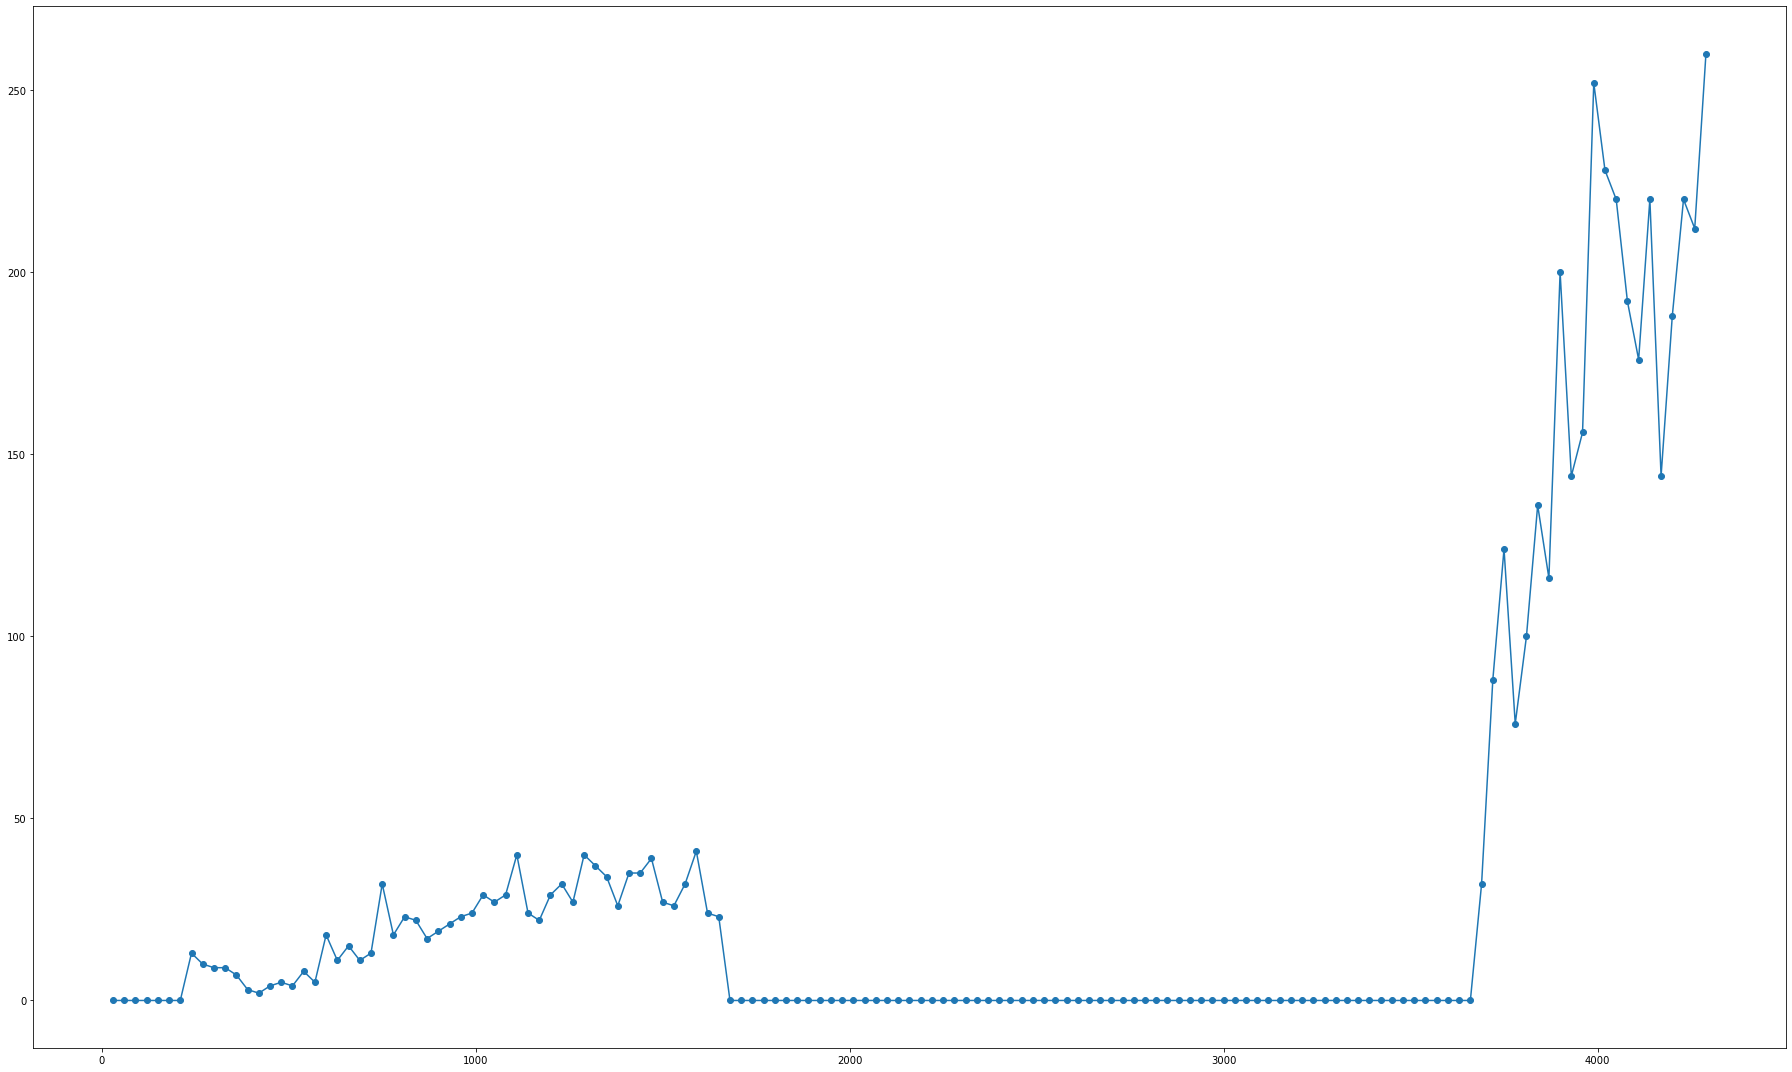

In [249]:
makeCityJsonFile(JsonFileNameList,"Cincinnati")
plotFrequencies(tweetFrequencies)

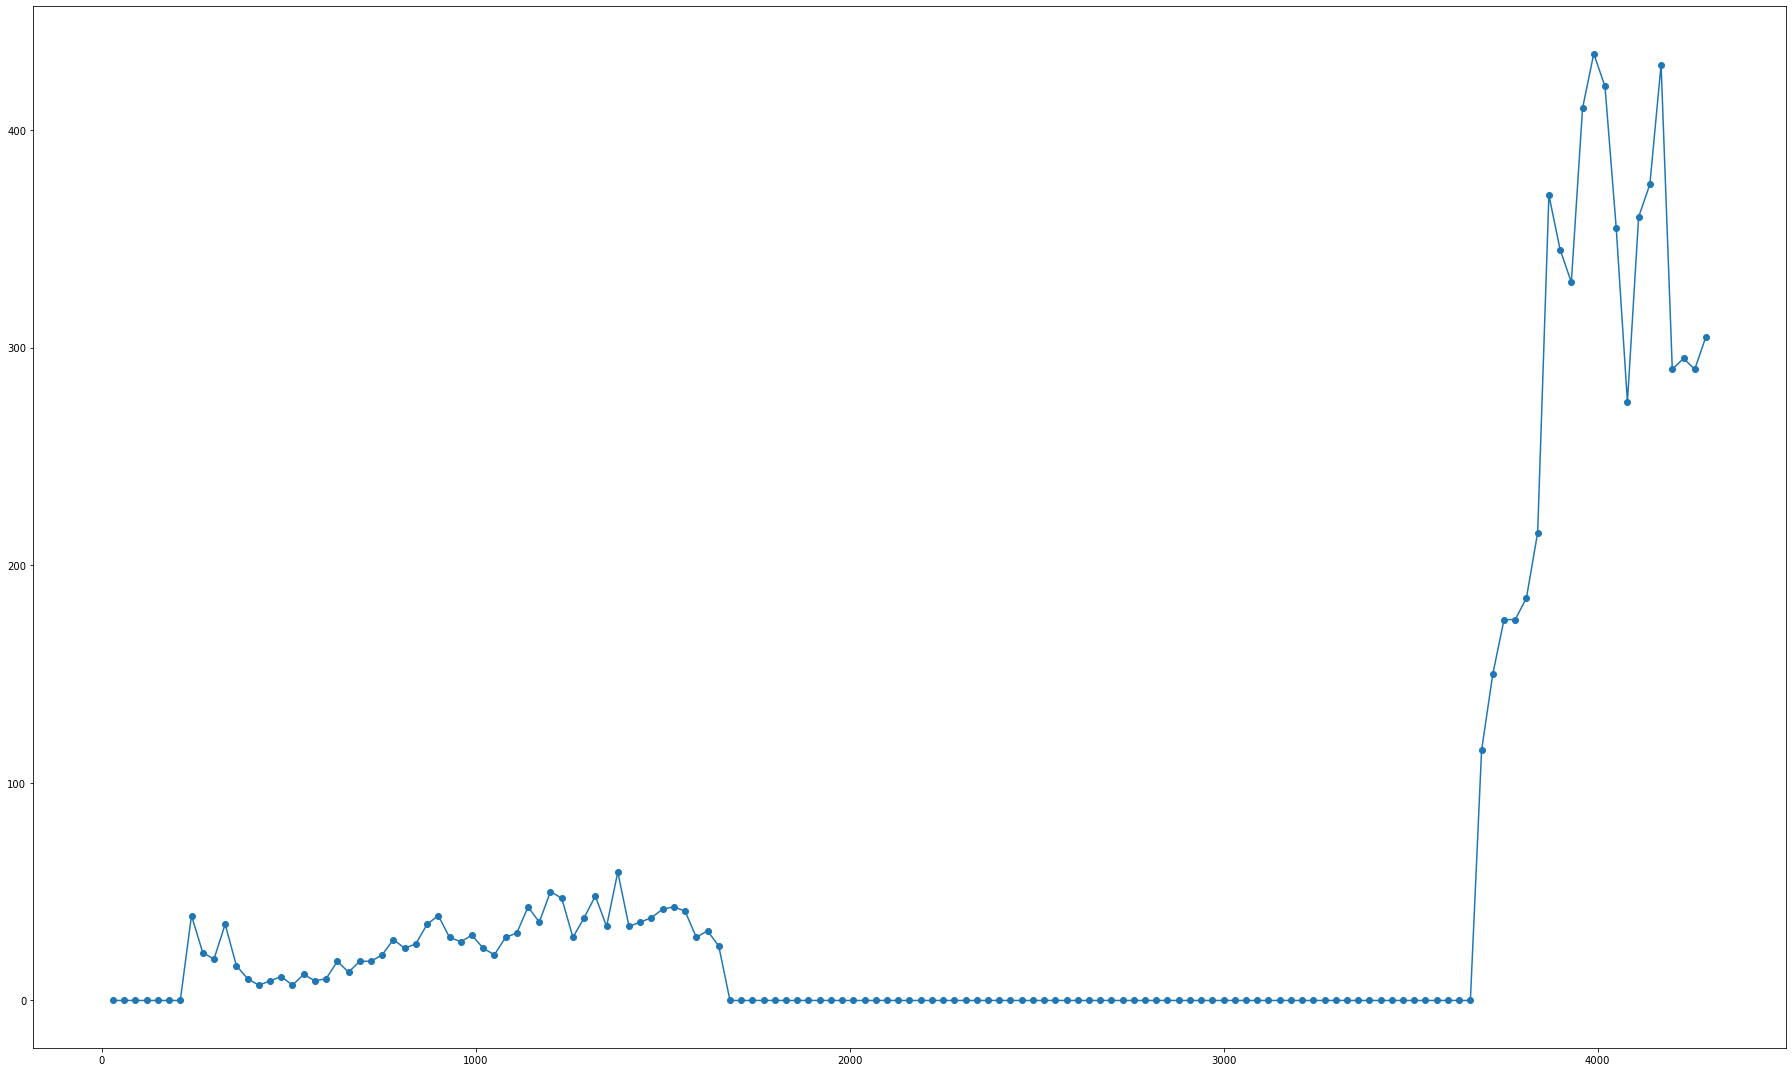

In [250]:
makeCityJsonFile(JsonFileNameList,"Cleveland")
tweetFrequencies(newDict)  
plotFrequencies(tweetFrequencies)

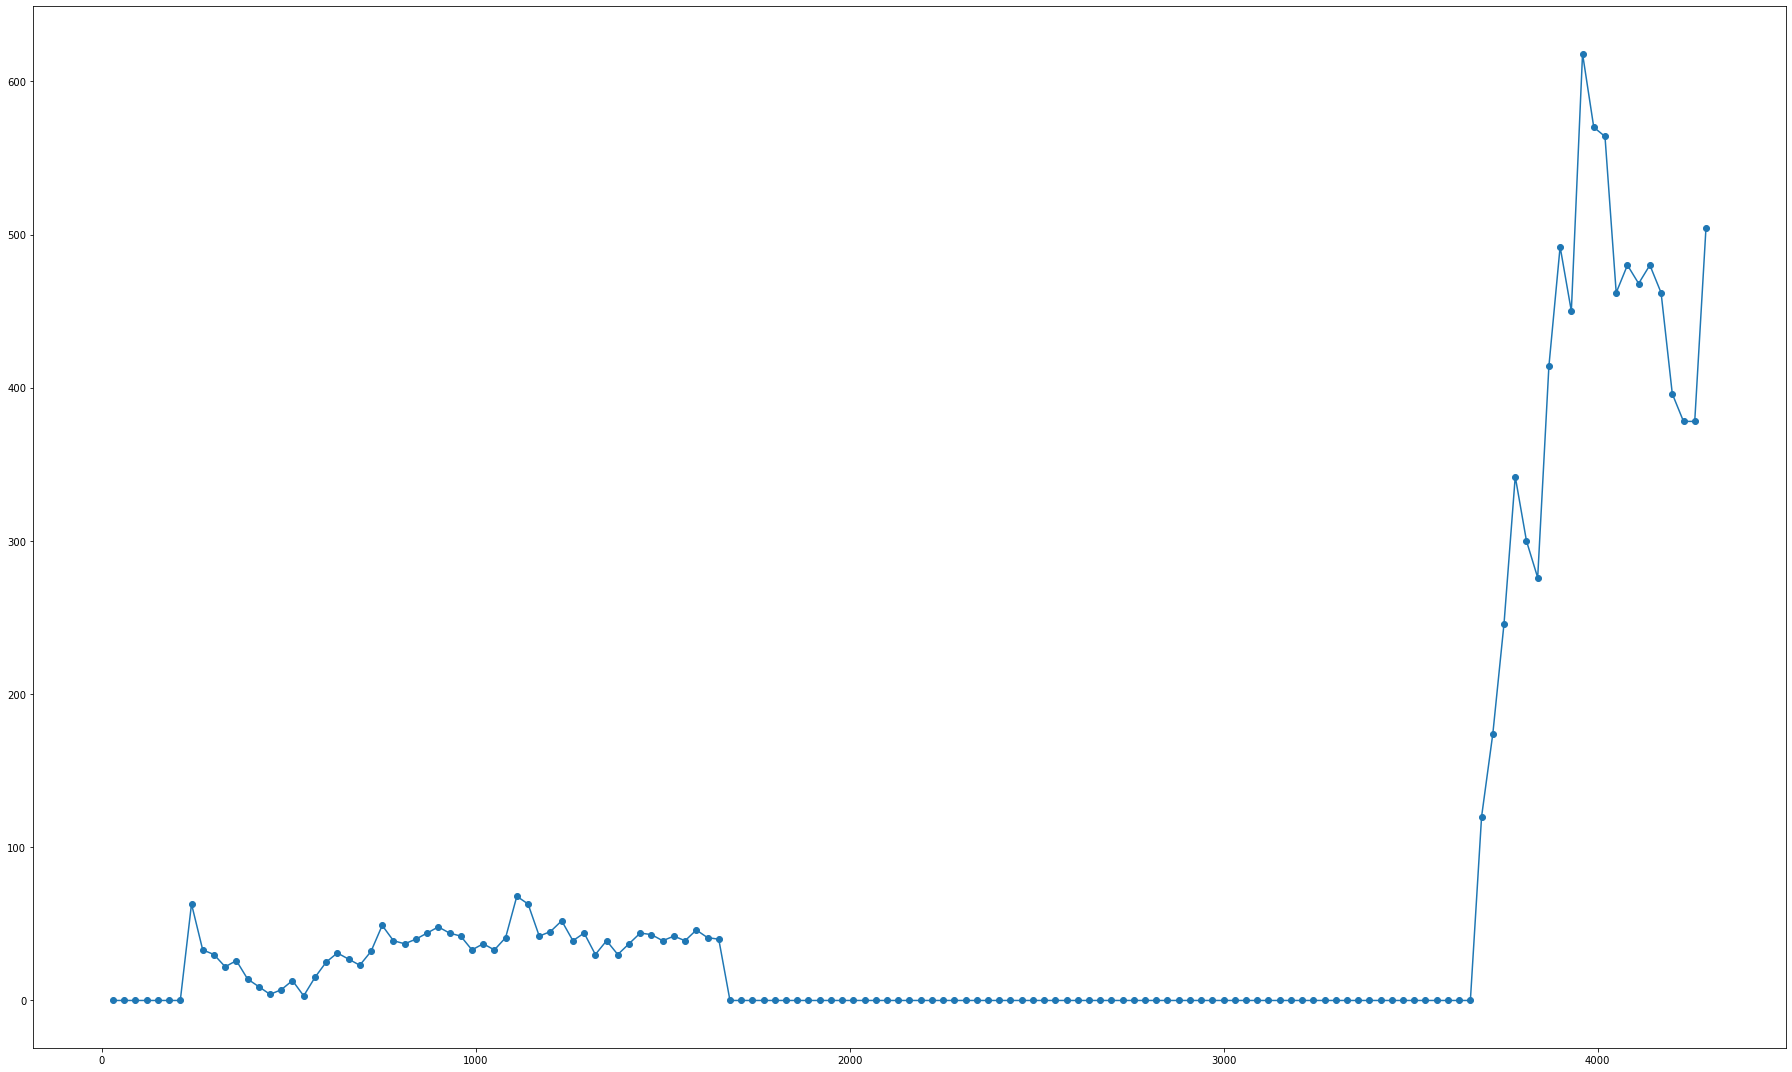

In [251]:
makeCityJsonFile(JsonFileNameList,"Columbus")
tweetFrequencies(newDict)  
plotFrequencies(tweetFrequencies)

Similar to Part 1, briefly summarize/explain how your Part 2 code works in the Markdown cell below. Additionally, briefly discuss some of the trends you see in the plots your code produces.
Why might there be spikes at certain times? Why might there be significant dips at other times?
Are there any significant differences between the volume/timing of the spikes for each city? 

First, we use the <code>convertTime(date)</code> function to convert the date into time by splitting the string by breaking it down into subparts. Then , we use it in our <code>TweetFrequencies(Dol)</code> function to calculate into which time intervals every tweet data we loop over falls into. Then , we use our <code>plotFrequencies(tweetFrequencies)</code> function to use those tweet frequencies to plot the tweet frequencies over the give timeframe for any city that is in our input data. 

##### We observed certain trends in our plots for the tweet frequencies per half an hour for Cleveland , Cincinnati and Columbus. The spikes for all three cities happen at the same time and significant dips also happen at the same time. There are no significant differences between the timing for each city. However , we have noted that the spike happened in the early hours of March 13, 2020 , which is when Former POTUS Donald J. Trump declared COVID-19 a national emergency. One possible reason is that since all three cities are in Ohio , an incident like the first set of reported cases or the first suspected case might have triggered a conversation on Twitter. Another possible reason is the state administration of Ohio or the mayors of those cities announcing certain measures leading to conversations on Twitter in these cities. Whatever happened has probably equally affected all three cities.The trajectory for all three cities is very similar. 

## Part 3 [10 points + 2 points EC]: Your Turn!


For this last part, perform some additional exploration/processing on the above data, or perhaps find/process other related data sets on Covid-19 that may be relevant.  Your processing/analysis does not have to especially sophisticated, but your goal should be to reveal some kind of interesting trends in the data. Your code should also ouput at least one plot or visualization. A couple example ideas might include:

* Modify the above code so that the (i) the "time buckets" in the dictionary returned by <code>tweetFrequencies(dol)</code> can be adjusted to be any time interval length, and (ii) the frequencies plotted at each time step can be "smoothed" to be a rolling hourly average instead of absolute number in the given interval. (Similar to the plots you've likely seen in the press). 

* There are several other relevant data sets on https://data.gesis.org/tweetscov19/ that include data for days beyond the three days considered in Parts 1 and 2. One idea would be to expand the above processing/analysis to more days and cities.

Note that if you're anaylsis is especially thorough or interesting, you can earn up to two points of extra credit.

#### In the below program , we take in .csv files containing national and state COVID-19 data from March 2020 - March 2021 and make different plots to observe how national and state trends fared over the one year span for which data was collected. The data was gathered by The COVID Tracking Project at The Atlantic. The dataset represents statistics related to covid from March 5, 2020 to March 7 , 2021 .

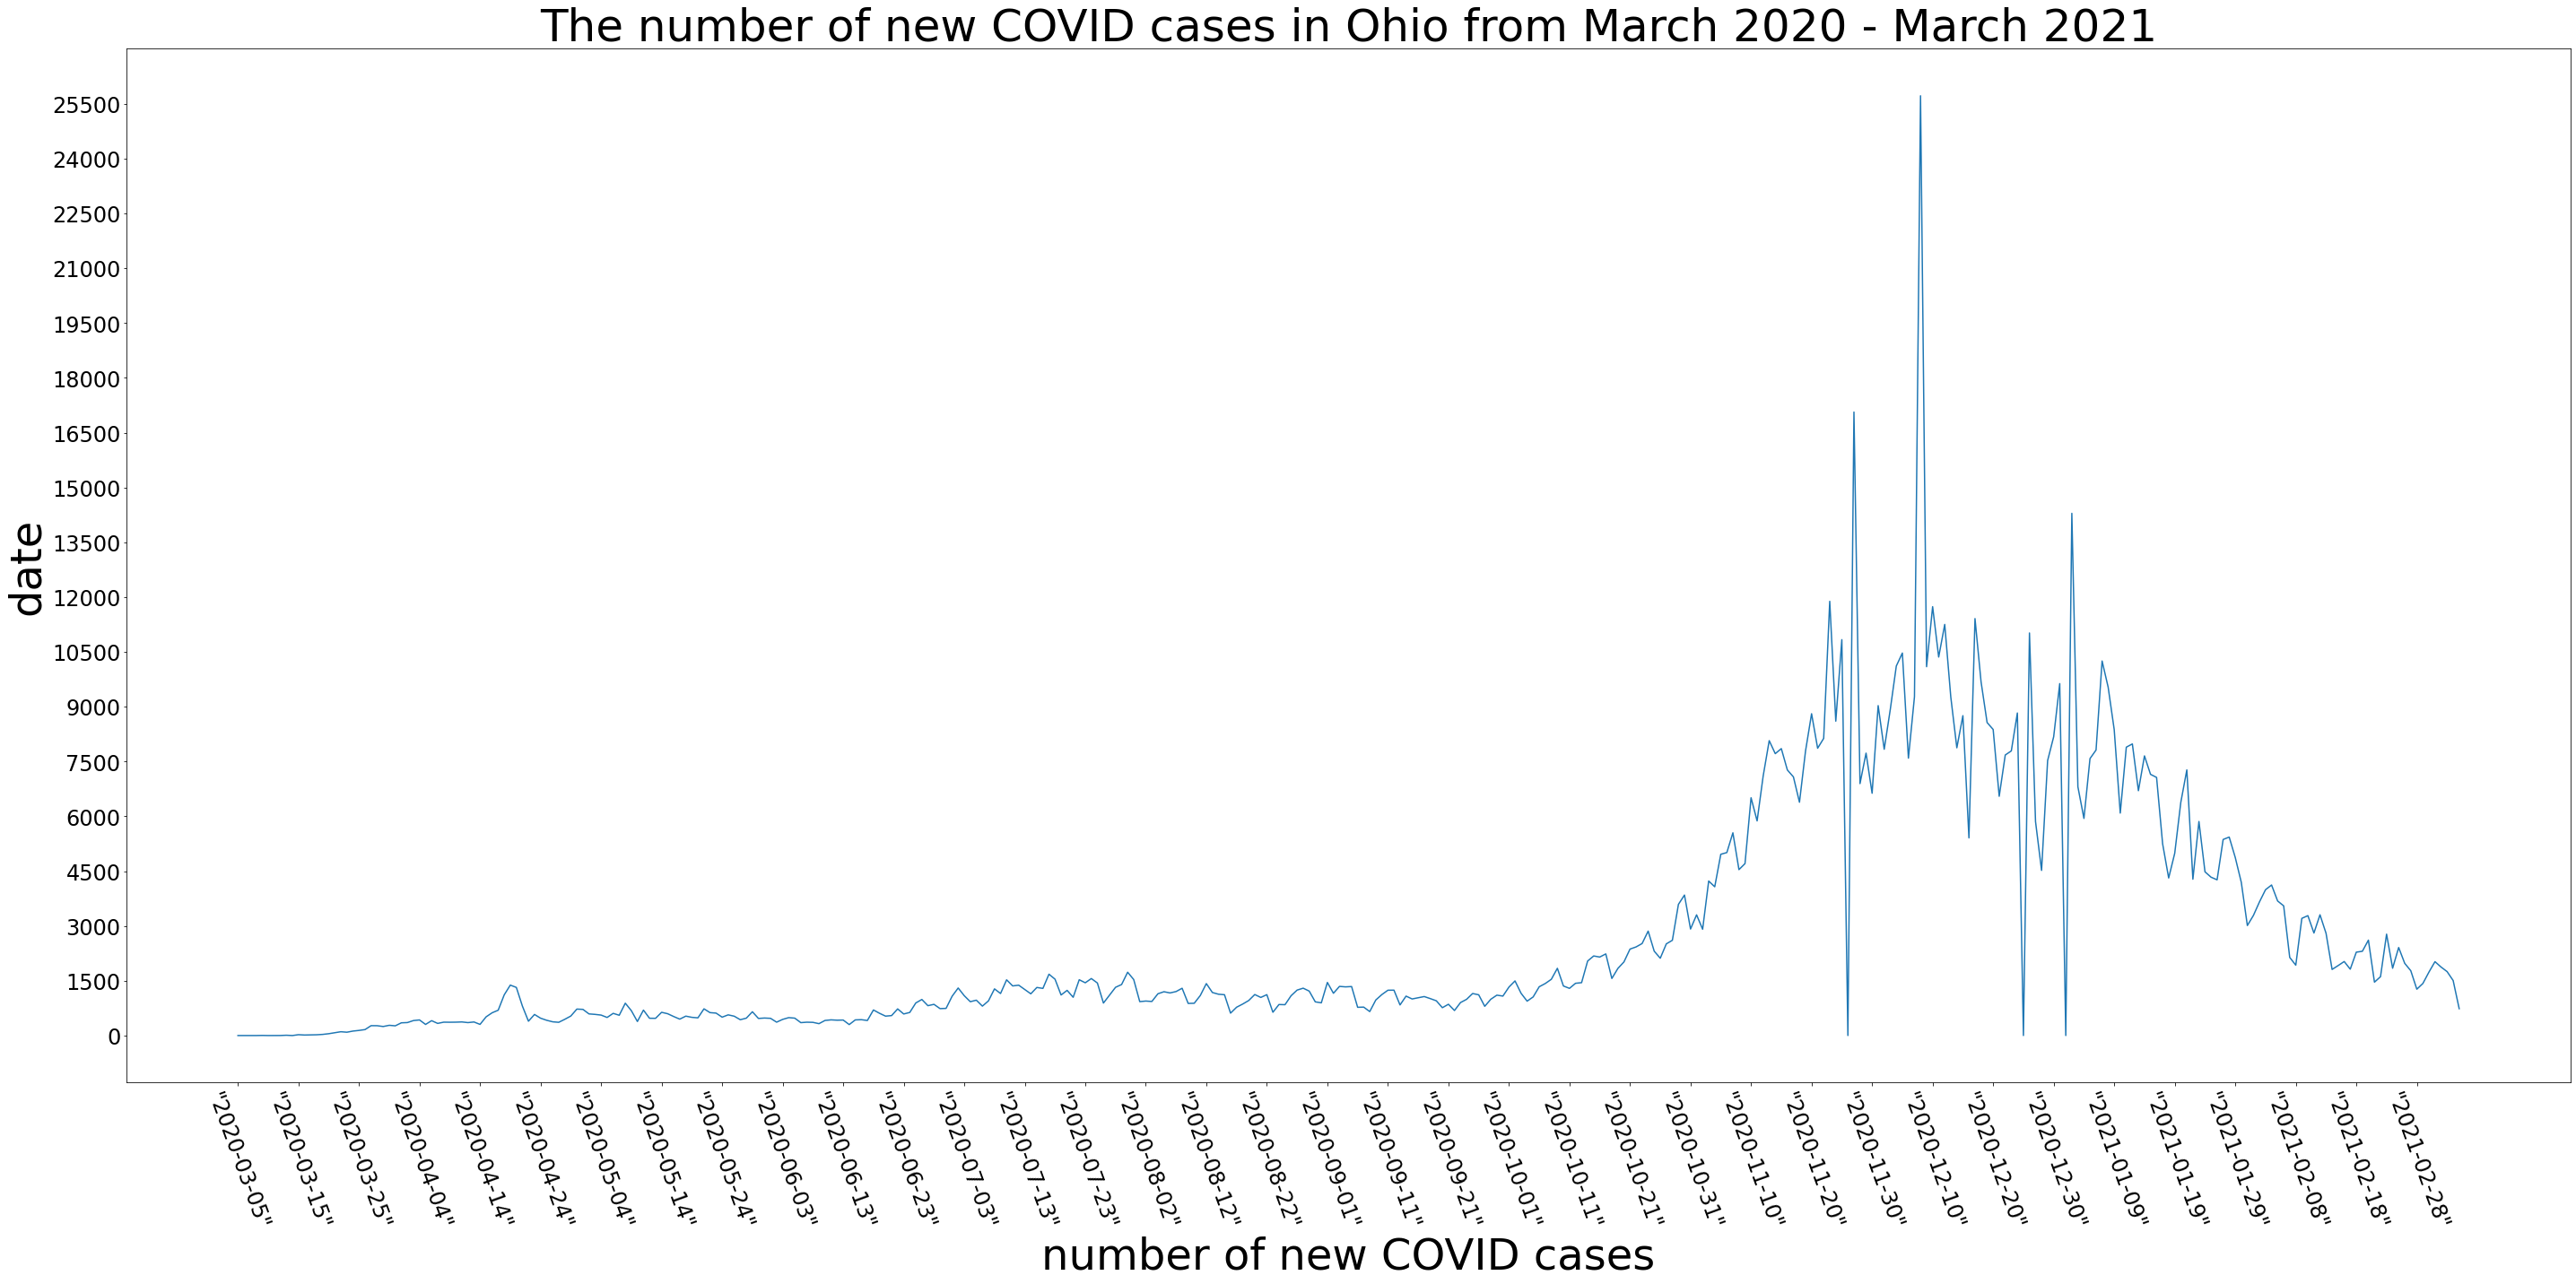

In [252]:
import pandas as pd 
import matplotlib.pyplot as pyplot
import numpy as np
file = open('ohio-history.csv', 'r', encoding = 'utf-8')
header = file.readline().strip().split(',')
lol = []
for line in file:
    line = line.strip().split(',')
    lol.append(line)
indicatorsDf = pd.DataFrame(lol, columns=header)
indicatorsDf.head(20)
w = indicatorsDf['"date"'].tolist()
w.reverse()
n = indicatorsDf['"positiveIncrease"'].tolist()
d = indicatorsDf['"hospitalizedIncrease"'].tolist()
h = indicatorsDf['"deathIncrease"'].tolist()
n.reverse()
d.reverse()
h.reverse()
op = [int(i) for i in n]
od = [int(i) for i in d]
oh = [int(i) for i in h]

pyplot.figure(figsize = (40,20))
pyplot.xticks(rotation=290)
pyplot.plot(w,op)
pyplot.xticks(np.arange(0, len(w)+1, 10))
pyplot.yticks(np.arange(0, max(op), 1500))
pyplot.xticks(fontsize= 24)
pyplot.yticks(fontsize= 24)
pyplot.xlabel("number of new COVID cases", fontsize=48)
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID cases in Ohio from March 2020 - March 2021", fontsize = 50)
pyplot.show()


##### The above code takes in a file called <code>ohio-history.csv</code> , that contains COVID statistics from March 2020- March 2021 for Ohio,  reads in the first line as the header, and loops over every line in the file and appends it into a list. Then , we use the list to make a pandas dataframe and make different lists from the pandas dataframe to collect the values for dates , the increase in the number of new covid cases, the increase in the number of covid deaths and the increase in the number of hospitalizations. Since the csv file was organized in reverse date order, we reverse the elements in the lists  and make our first plot : the increase in the number of covid cases per day.

##### As we can observe from the above plot , the number of covid cases was steadily increasing and had its peak in the Fall of 2020, in the months of November and December. The few exceptions in these months where the increase in the number of COVID cases was 0 could possibly be attributed to days where data was not collected and reported. We can also observe that after the November - December 2020 peak,when the US entered its second COVID wave,  the increase in the number of covid cases falls again.  

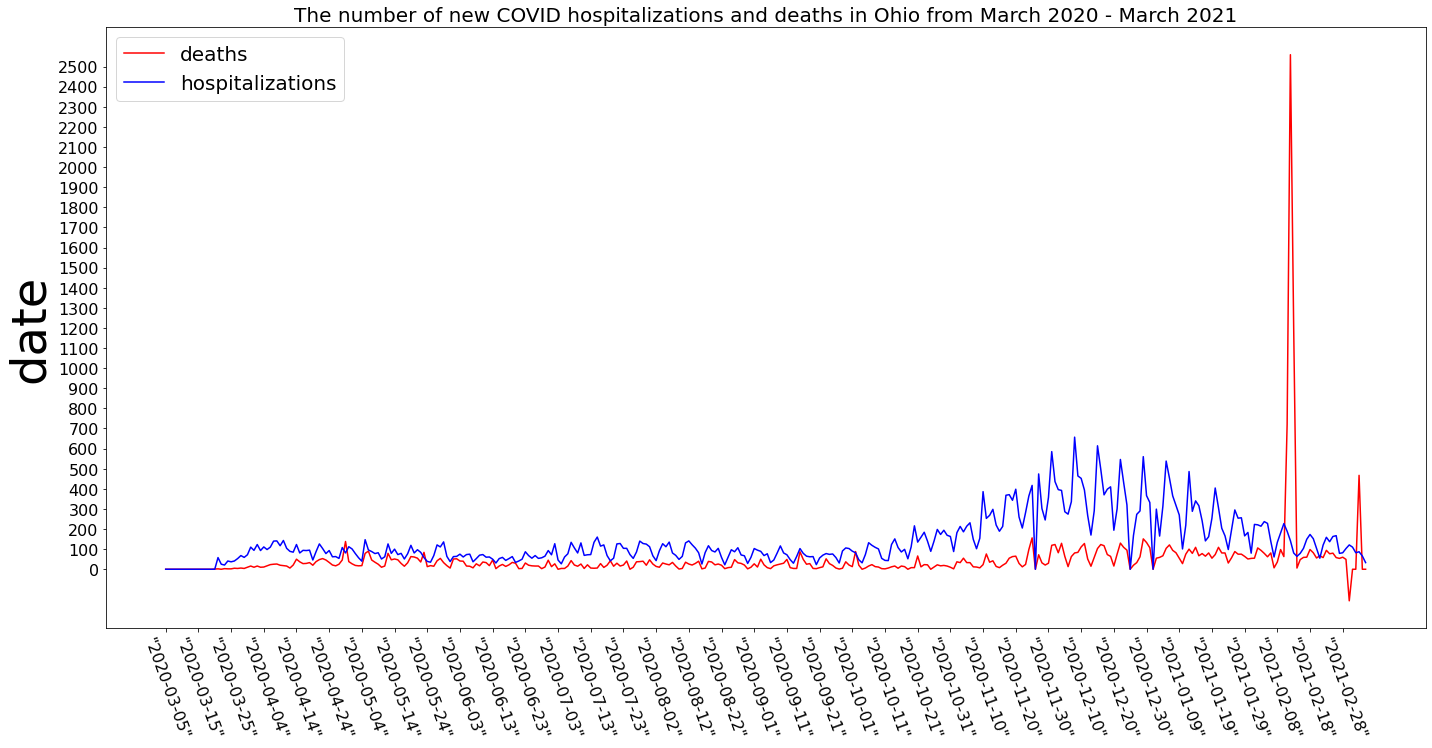

In [253]:
import matplotlib.pyplot as pyplot
import numpy as np
maxc = max(oh + od)
fig, ax1 = pyplot.subplots()
pyplot.rcParams["figure.figsize"] = [20.00, 10.50]
pyplot.rcParams["figure.autolayout"] = True
pyplot.xticks(rotation=290)
ax1.plot(w,oh, color = "red",label = "deaths")

ax1.plot(w,od, color='blue', label = "hospitalizations")
pyplot.legend(loc="upper left", fontsize = 20)

pyplot.xticks(np.arange(0, len(w)+1, 10))
pyplot.yticks(np.arange(0, maxc, 100))
pyplot.xticks(fontsize= 16)
pyplot.yticks(fontsize= 16)
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID hospitalizations and deaths in Ohio from March 2020 - March 2021", fontsize = 20)

pyplot.show()

##### The above code makes a plot of the increase in covid hospitalizations and covid deaths per day for the same time-frame. We can observe that during the first wave of the virus , the gap number of hospitalizations and deaths was much smaller compared to the second wave in November - December 2020 when the number of hospitalizations increased very sharply but the difference between the number of hospitalizations and the number of deaths was much bigger than it was in the first wave . From this difference , we can infer that the survival rate for people who were hospitalized during the second wave was better. The two abnormalities in this plot , where the number of deaths was 2500 followed by a negative value in March 2021 could possibly be attributed to an adjustment for an underreported number and an adjustment for an overreported number respectively.

##### We extend our analysis to further states in the below cells by processing more .csv files in a similar manner to observe trends in three more states: Florida , North Dakota and Georgia.

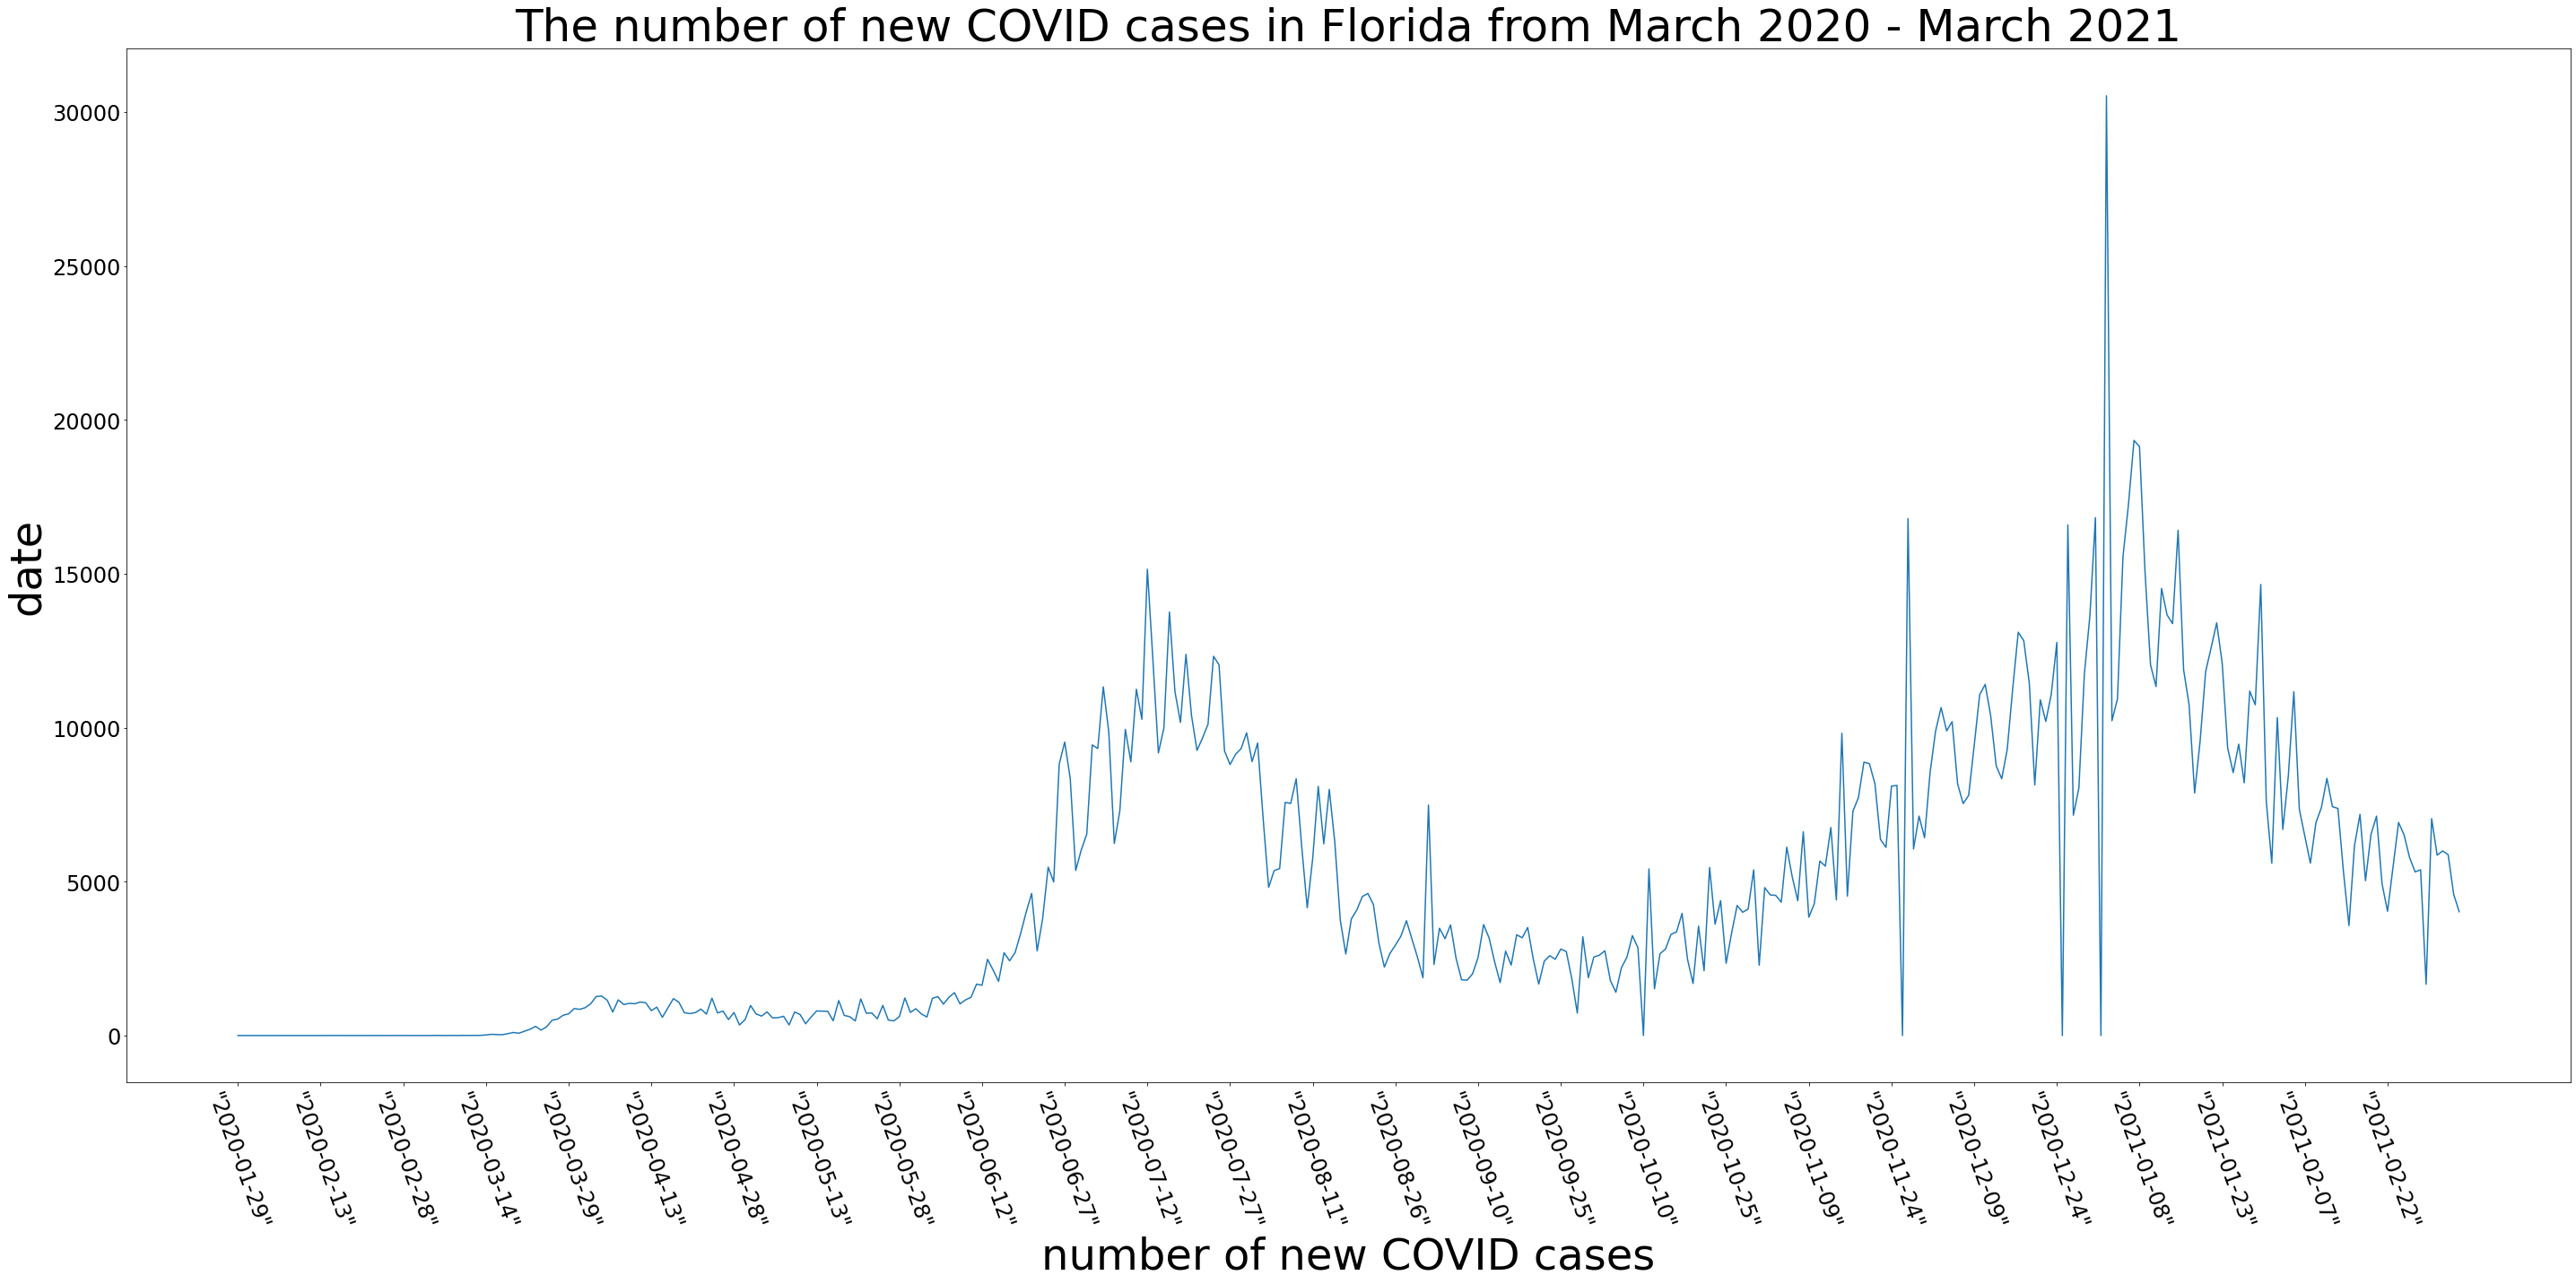

In [254]:
import pandas as pd 
import matplotlib.pyplot as pyplot
import numpy as np
file = open('florida-history.csv', 'r', encoding = 'utf-8')
header = file.readline().strip().split(',')
lol = []
for line in file:
    line = line.strip().split(',')
    lol.append(line)
uindicatorsDf = pd.DataFrame(lol, columns=header)
uindicatorsDf.head(20)
usdatelist = uindicatorsDf['"date"'].tolist()
usdatelist.reverse()

ntnl = uindicatorsDf['"positiveIncrease"'].tolist()
nt = uindicatorsDf['"hospitalizedIncrease"'].tolist()
nb = uindicatorsDf['"deathIncrease"'].tolist()
ntnl.reverse()
nt.reverse()
nb.reverse()
rr = [int(i) for i in ntnl]
ll = [int(i) for i in nt]
bb = [int(i) for i in nb]

pyplot.figure(figsize = (40,20))
pyplot.xticks(rotation=290)
pyplot.plot(usdatelist,rr)
pyplot.xticks(np.arange(0, len(usdatelist)+1, 15))
pyplot.xticks(fontsize= 24) 
pyplot.yticks(np.arange(0, max(rr), 5000))
pyplot.yticks(fontsize= 24) 
pyplot.xlabel("number of new COVID cases", fontsize=48)
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID cases in Florida from March 2020 - March 2021", fontsize = 50)
pyplot.show()

##### As we can observe from the above plot,which represents the increase in the number of cases for Florida,  the first big wave of covid cases came in the summer of 2020, in July . Then, the second big wave for Florida was  December 2020 - January 2021, after which the number of cases rises and falls but never peaks to those levels in the second big wave. The three incidences in the plot where a 0 value is followed by a sharp peak could be attributed to days there were missing entries for the increase in the number of covid cases and the following adjustments.

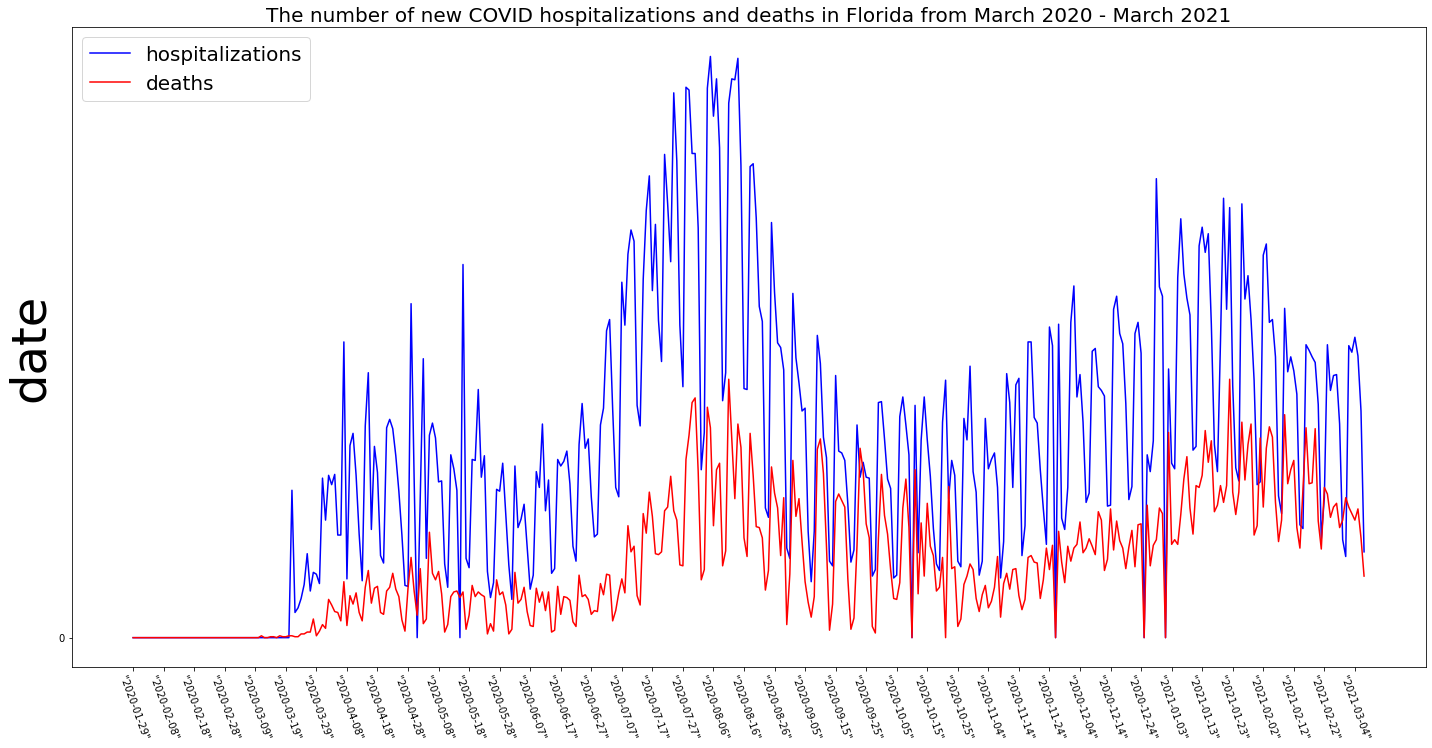

In [255]:
import matplotlib.pyplot as plt
maxd = max(ll + bb)
fig, ax1 = pyplot.subplots()
plt.rcParams["figure.figsize"] = [20.00, 10.50]
plt.rcParams["figure.autolayout"] = True
pyplot.xticks(rotation=290)
ax1.plot(usdatelist,ll, color = "blue", label = "hospitalizations")

ax1.plot(usdatelist,bb, color='red', label = "deaths")
pyplot.legend(loc="upper left", fontsize = 20)

pyplot.xticks(np.arange(0, len(usdatelist)+1, 10))
pyplot.yticks(np.arange(0, maxd, 1000))
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID hospitalizations and deaths in Florida from March 2020 - March 2021", fontsize = 20)

pyplot.show()

##### As we can observe from the above plot, the number of hospitalizations peaked during the first big wave of COVID for Florida , which is when the number of new covid cases increased. The number of deaths also peaked at this time. The number of hospitalizations declined and went on the rise again in January 2021( Second Wave).

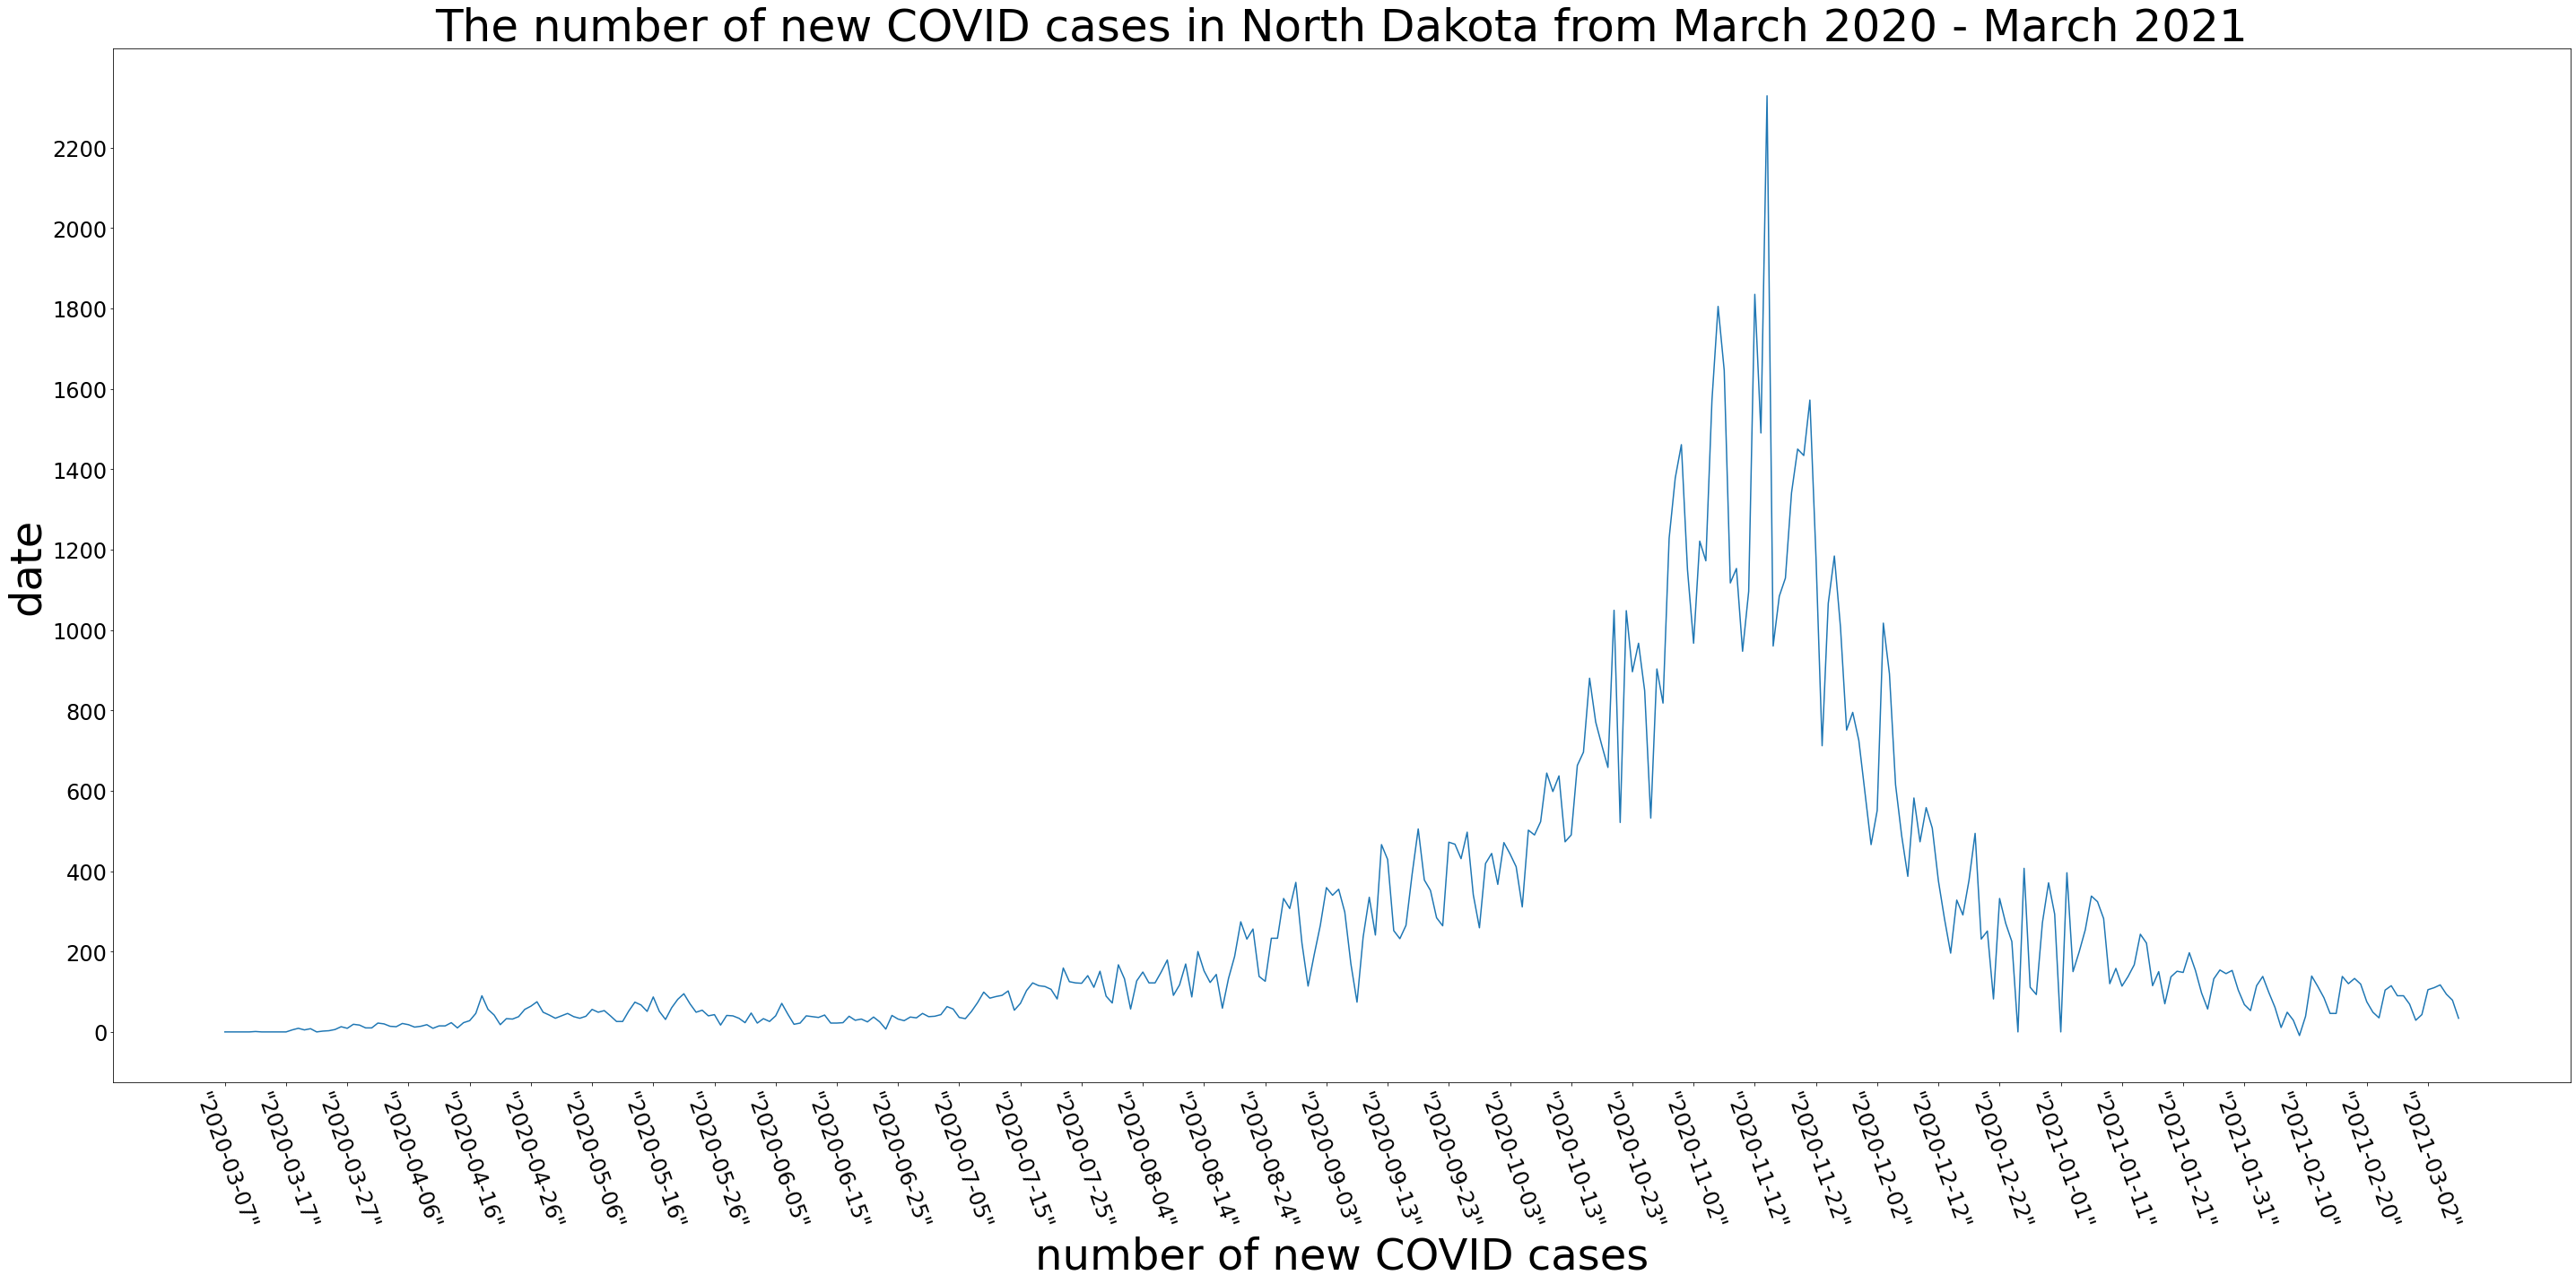

In [256]:
import pandas as pd 
import matplotlib.pyplot as pyplot
import numpy as np
file = open('north-dakota-history.csv', 'r', encoding = 'utf-8')
header = file.readline().strip().split(',')
lol = []
for line in file:
    line = line.strip().split(',')
    lol.append(line)
uindicatorsDf = pd.DataFrame(lol, columns=header)
uindicatorsDf.head(20)
usdatelist = uindicatorsDf['"date"'].tolist()
usdatelist.reverse()

ntnl = uindicatorsDf['"positiveIncrease"'].tolist()
nt = uindicatorsDf['"hospitalizedIncrease"'].tolist()
nb = uindicatorsDf['"deathIncrease"'].tolist()
ntnl.reverse()
nt.reverse()
nb.reverse()
rr = [int(i) for i in ntnl]
ll = [int(i) for i in nt]
bb = [int(i) for i in nb]


pyplot.figure(figsize = (40,20))
pyplot.xticks(rotation=290)
pyplot.plot(usdatelist,rr)
pyplot.xticks(np.arange(0, len(usdatelist)+1, 10))
pyplot.xticks(fontsize= 24) 
pyplot.yticks(np.arange(0, max(rr), 200))
pyplot.yticks(fontsize= 24) 
pyplot.xlabel("number of new COVID cases", fontsize=48)
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID cases in North Dakota from March 2020 - March 2021", fontsize = 50)
pyplot.show()

##### As we can observe from the above plot of the change in the number of new COVID cases from March 2020 to March 2021 for North Dakota, the number of new covid cases increased steadily from July 2020 onwards and peaked in November 2020. The number of covud cases decreased steadily upto March 2021.

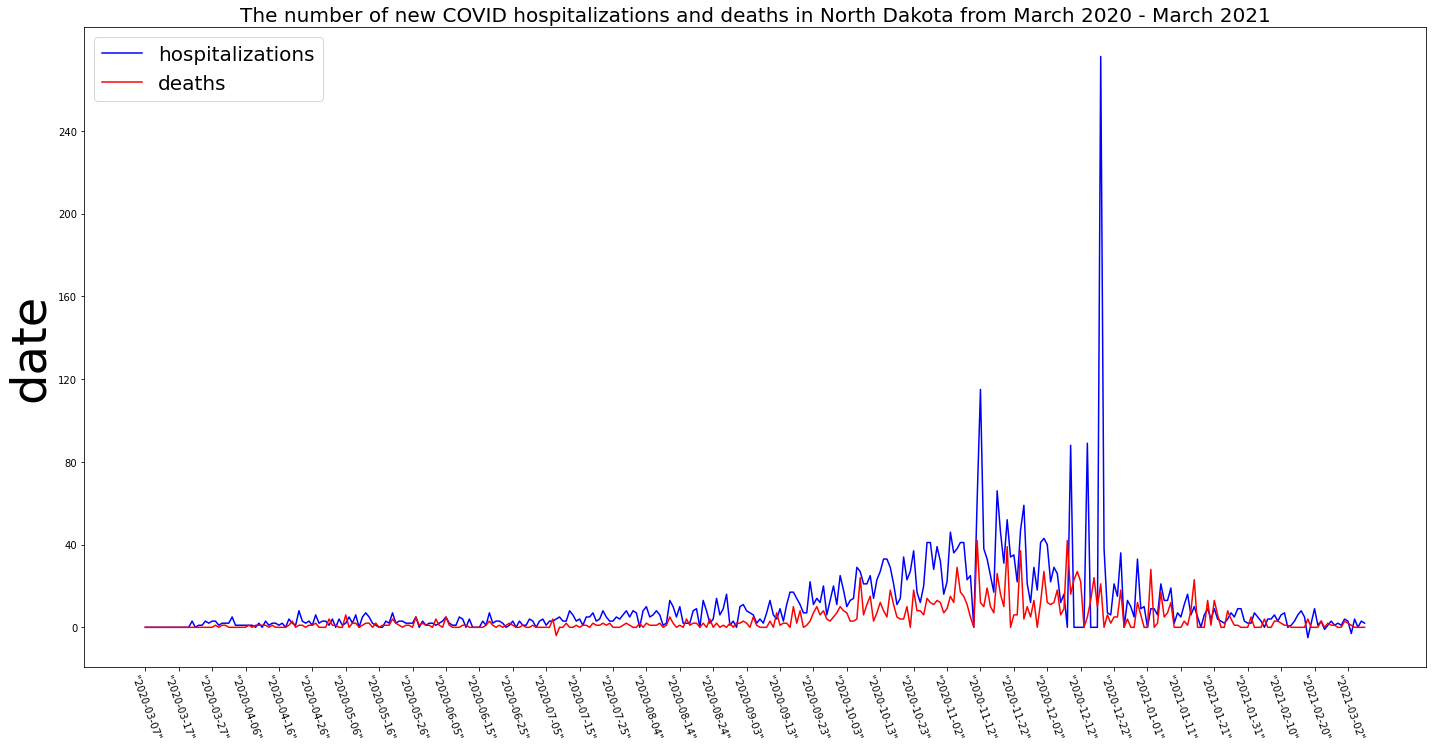

In [257]:
import matplotlib.pyplot as plt
maxd = max(ll + bb)
fig, ax1 = pyplot.subplots()
plt.rcParams["figure.figsize"] = [20.00, 10.50]
plt.rcParams["figure.autolayout"] = True
pyplot.xticks(rotation=290)
ax1.plot(usdatelist,ll, color = "blue", label = "hospitalizations")

ax1.plot(usdatelist,bb, color='red', label = "deaths")
pyplot.legend(loc="upper left", fontsize = 20)

pyplot.xticks(np.arange(0, len(usdatelist)+1, 10))
pyplot.yticks(np.arange(0, maxd, 40))
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID hospitalizations and deaths in North Dakota from March 2020 - March 2021", fontsize = 20)


pyplot.show()

##### As we can observe from the above plot for the number of COVID hospitalizations and deaths from March 2020 - 2021 in North Dakota, even though the number of hospitalizations peaks during December 2020, we can infer from the previous trend that this number is an anomaly , possibly an adjustment for previous underreported values being a factor. The second peak in the number of hospitalizations comes in November 2020 , when the number of new cases also peaks. There are multiple days in this time frame when the number of recorded deaths from COVID was more than the number of hospitalizations. 

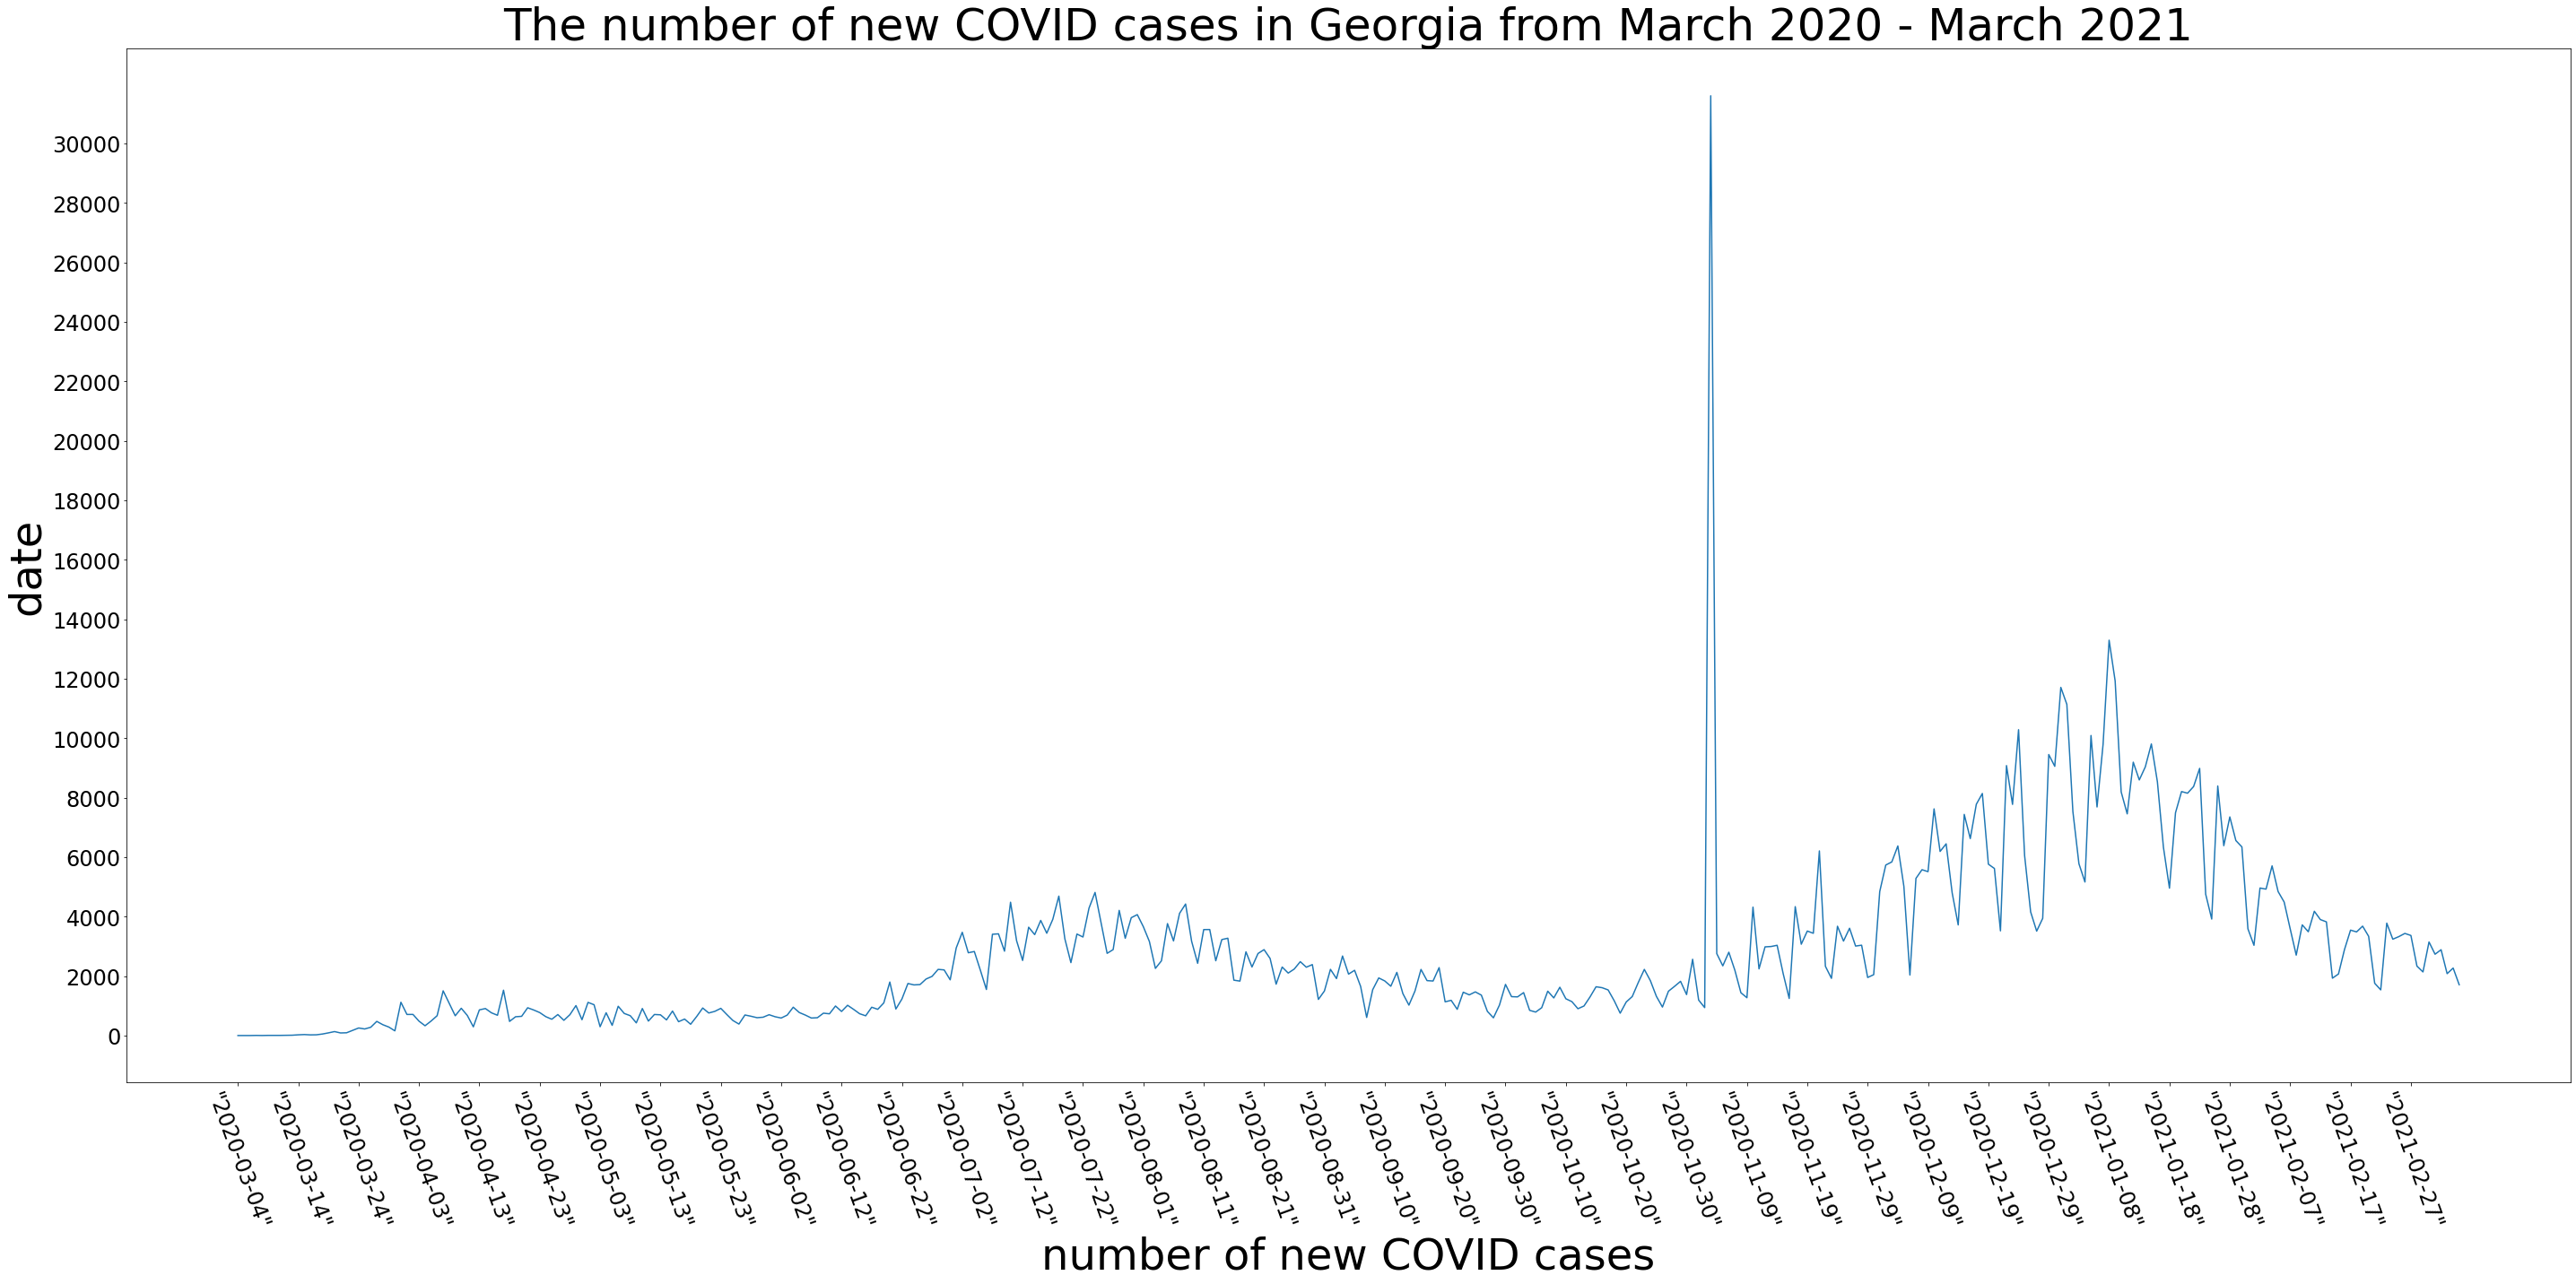

In [258]:
import pandas as pd 
import matplotlib.pyplot as pyplot
import numpy as np
file = open('georgia-history.csv', 'r', encoding = 'utf-8')
header = file.readline().strip().split(',')
lol = []
for line in file:
    line = line.strip().split(',')
    lol.append(line)
uindicatorsDf = pd.DataFrame(lol, columns=header)
uindicatorsDf.head(20)
usdatelist = uindicatorsDf['"date"'].tolist()
usdatelist.reverse()
ntnl = uindicatorsDf['"positiveIncrease"'].tolist()
nt = uindicatorsDf['"hospitalizedIncrease"'].tolist()
nb = uindicatorsDf['"deathIncrease"'].tolist()
ntnl.reverse()
nt.reverse()
nb.reverse()
rr = [int(i) for i in ntnl]
ll = [int(i) for i in nt]
bb = [int(i) for i in nb]

pyplot.figure(figsize = (40,20))
pyplot.xticks(rotation=290)
pyplot.plot(usdatelist,rr)
pyplot.xticks(np.arange(0, len(usdatelist)+1, 10))
pyplot.xticks(fontsize= 24) 
pyplot.yticks(np.arange(0, max(rr), 2000))
pyplot.yticks(fontsize= 24) 
pyplot.xlabel("number of new COVID cases", fontsize=48)
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID cases in Georgia from March 2020 - March 2021", fontsize = 50)
pyplot.show()

##### As we can observe from the above plot for the number of COVID hospitalizations and deaths from March 2020 - March 2021 in Georgia , the first wave of new COVID case spikes happens in July 2020 , folowed by the biggest COVID cases wave in December 2020- January 2021. The 30,000 new COVID cases reported in October 2020 is an abnormality in comparison to the COVID case trends we observed in the rest of our data , which led us to the inference that it is possibly an adjustment for previous underreported values. 


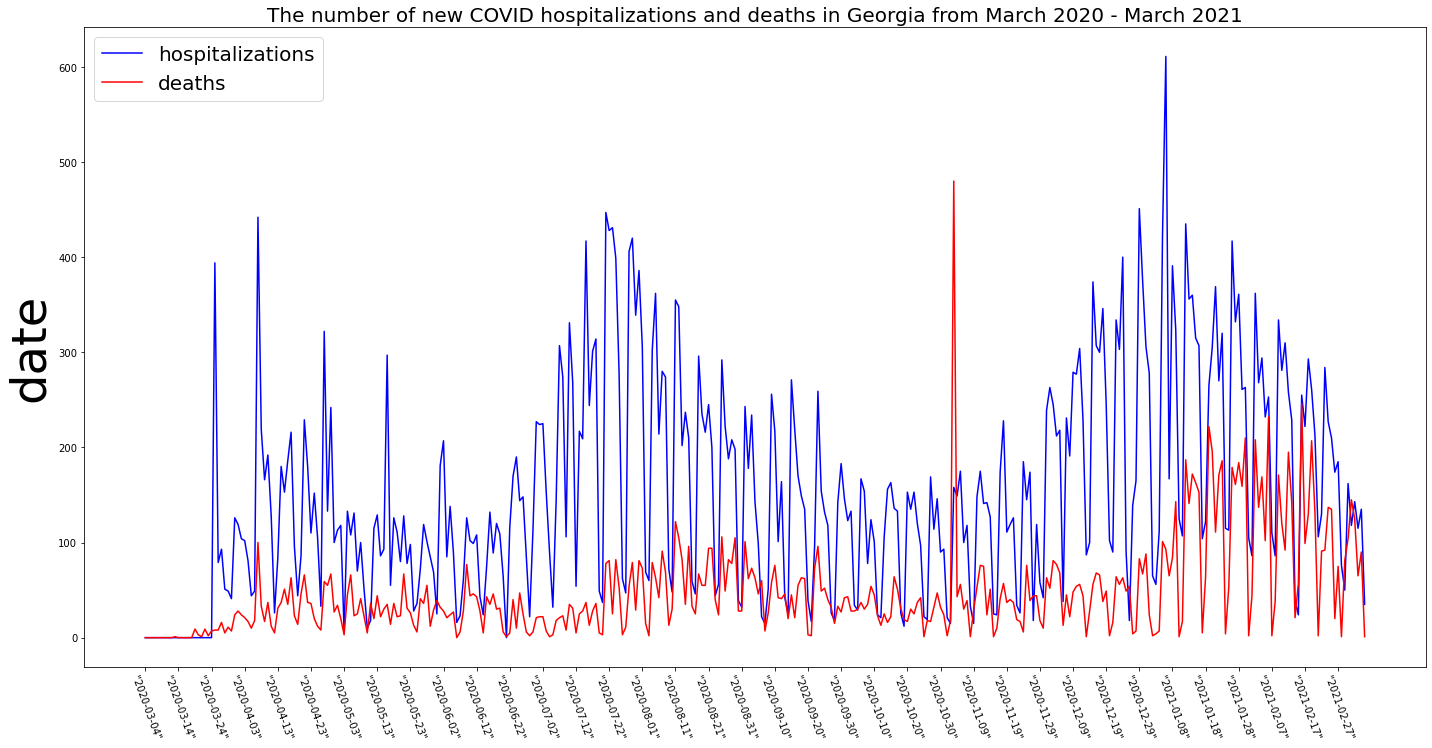

In [259]:
import matplotlib.pyplot as plt
maxd = max(ll + bb)
fig, ax1 = pyplot.subplots()
plt.rcParams["figure.figsize"] = [20.00, 10.50]
plt.rcParams["figure.autolayout"] = True
pyplot.xticks(rotation=290)
ax1.plot(usdatelist,ll, color = "blue", label = "hospitalizations")
ax1.plot(usdatelist,bb, color='red', label = "deaths")
pyplot.legend(loc="upper left", fontsize = 20)

pyplot.xticks(np.arange(0, len(usdatelist)+1, 10))
pyplot.yticks(np.arange(0, maxd, 100))
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID hospitalizations and deaths in Georgia from March 2020 - March 2021", fontsize = 20)
pyplot.show()

##### As we can observe from the above plot for the number of COVID hospitalizations and deaths from March 2020 - March 2021 in Georgia , the number of hospitalizations peaks during the biggest COVID case spike in December . The second biggest number of hospitalizations were also at a similar time to the second biggest COVID cases spike. The number of deaths peaks during January 2021, after the biggest COVID -19 spike for Georgia. The difference in the number of new hospitalizations and the number of new deaths decreases as we moved further into late 2020 and early 2021- suggesting that the second US COVID wave was the deadliest wave for Georgia .

#### The below code extends a similar analysis that we did at the state level to a National Level.

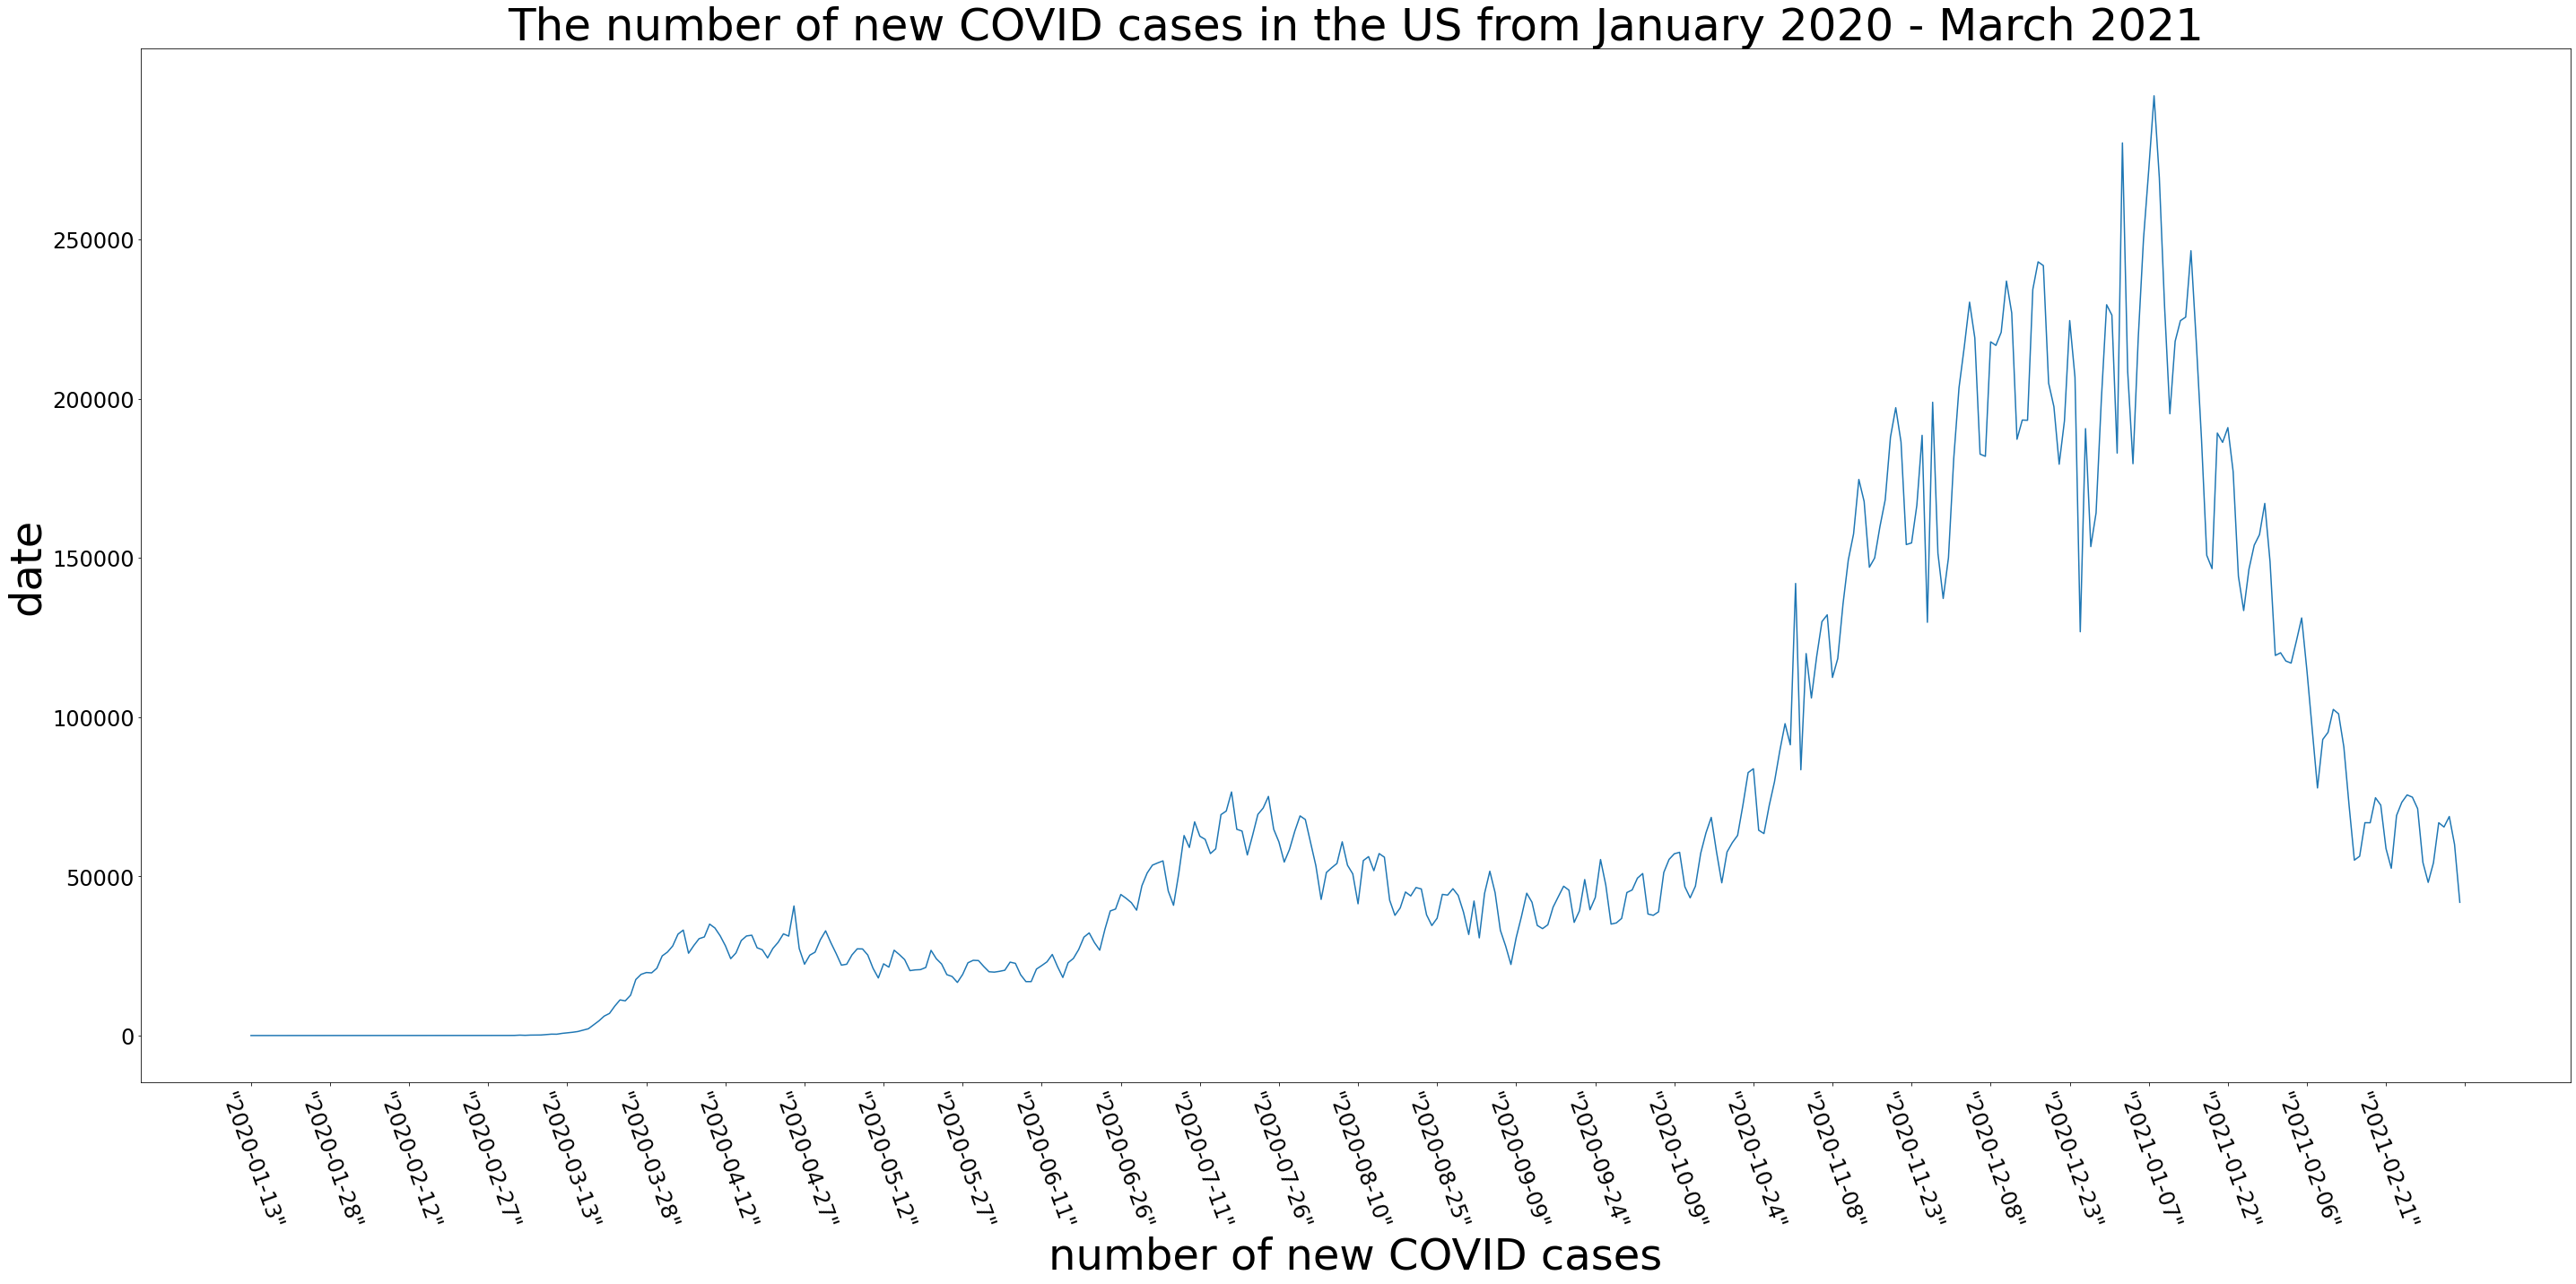

In [260]:
import pandas as pd 
import matplotlib.pyplot as pyplot
import numpy as np
file = open('national-history.csv', 'r', encoding = 'utf-8')
header = file.readline().strip().split(',')
lol = []
for line in file:
    line = line.strip().split(',')
    lol.append(line)
uindicatorsDf = pd.DataFrame(lol, columns=header)
uindicatorsDf.head(20)
usdatelist = uindicatorsDf['"date"'].tolist()
usdatelist.reverse()
ntnl = uindicatorsDf['"positiveIncrease"'].tolist()
nt = uindicatorsDf['"hospitalizedIncrease"'].tolist()
nb = uindicatorsDf['"deathIncrease"'].tolist()
ntnl.reverse()
nt.reverse()
nb.reverse()
rr = [int(i) for i in ntnl]
ll = [int(i) for i in nt]
bb = [int(i) for i in nb]
#print(len(op))
#print(n)

pyplot.figure(figsize = (40,20))
pyplot.xticks(rotation=290)
pyplot.plot(usdatelist,rr)
pyplot.xticks(np.arange(0, len(usdatelist)+1, 15))
pyplot.xticks(fontsize= 24) 
pyplot.yticks(np.arange(0, max(rr), 50000))
pyplot.yticks(fontsize= 24) 
pyplot.xlabel("number of new COVID cases", fontsize=48)
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID cases in the US from January 2020 - March 2021", fontsize = 50)
pyplot.show()

##### As we can observe from the above plot that shows the change in the number of new COVID-19 cases in the US from January 2020-March 2021, nationally, the first big "wave" of cases in this timeframe is observed in June 2020 - August 2020. However , the increase in the number of new COVID cases during this timeframe is small compared to the biggest wave that increased sharply from November 2020- January 2021 and peaked during January 2021. This could possibly have been caused by the fact that this time of the year is the biggest holiday season in the United States (Thanksgiving , Christmas , New Year) and travel and mobility increase during those months. The number of new cases falls sharply after Mid-January of 2021. 

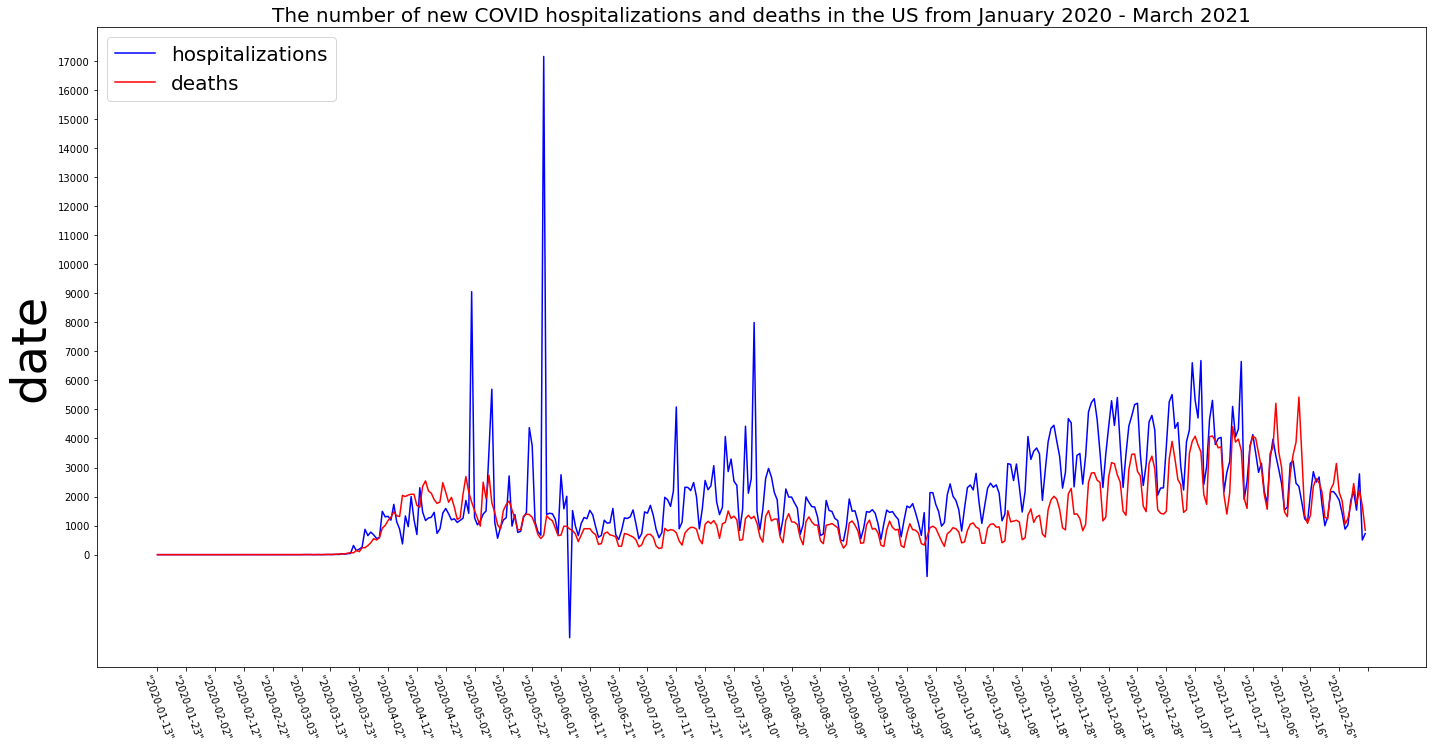

In [261]:
import matplotlib.pyplot as plt
maxd = max(ll + bb)
fig, ax1 = pyplot.subplots()
plt.rcParams["figure.figsize"] = [20.00, 10.50]
plt.rcParams["figure.autolayout"] = True
pyplot.xticks(rotation=290)
ax1.plot(usdatelist,ll, color = "blue", label = "hospitalizations")
ax1.plot(usdatelist,bb, color='red', label = "deaths")
pyplot.legend(loc="upper left", fontsize = 20)
pyplot.ylabel("date", fontsize=48)
pyplot.title("The number of new COVID hospitalizations and deaths in the US from January 2020 - March 2021", fontsize = 20)
pyplot.xticks(np.arange(0, len(usdatelist)+1, 10))
pyplot.yticks(np.arange(0, maxd, 1000))
pyplot.show()

##### As we can observe from the above plots that show the increase in the number of new COVID hospitalizations and deaths in the US from January 2020- March 2021, the number of deaths and the number of new hospitalizations remain relatively close until October 2020, after which a visible gap starts to grow, The two negative entries and the 17000 cases reported for a single day in May could be attributed to adjustments for underreported number of hospitalizations and overreported number of hospitalizations respectively. 

##### Overall , our visualizations for the states of Ohio , Florida , Georgia , North Dakota and the US help us observe certain similar trends in the trajectory of the number of COVID cases , hospitalizations and deaths from January 2020 - March 2021. First , we observe that even though the number of new COVID cases spiked in June and July of 2020 , that was not the case for every state. Our plots for Ohio and North Dakota are good examples that the trajectory for different states was different. Second , we also observe that even though the difference in the number of new COVID hospitalizations and deaths grows bigger after Fall 2020 nationally , it is not the case for every state in the US. Our plots for Georgia and North Dakota show that in some cases , the difference was much smaller , or even negative , meaning that there were more deaths than hospitalizations in Fall 2020. From our plots for the states , we can also infer that the number of hospitalizations and the number of deaths increase when the number of new cases increases and decrease when the number of new cases decreases. Finally , we observe that both at state and national level , December 2020 - January 2021 was the biggest COVID wave in the US from January 2020 - March 2021. Our plots for the number of new cases , deaths and hospitalizations clearly indicate this.